# **EDA**

## Objectives

1. Test key hypotheses about factors influencing movie success
2. Identify statistically significant relationships between budget, revenue, ROI, ratings, and language
3. Create visualisations that communicate insights effectively
4. Provide actionable insights for stakeholders and dashboard development

## Inputs

* `Data/PROCESSED/movies_ready_for_EDA.csv`
* Libraries: `Pandas`, `Numpy`, `Matplotlib`, `Seaborn`, `Plotly`, `Pingouin`, and `ast`
* Features: Budget, Revenue, ROI, Popularity, Vote_average, Original_language
## Outputs

* Statistical test results with interpretations for each hypothesis
* Visualisations (scatter plots, box plots, heatmaps, bar charts)
* Key Summary insights 

## Research Hypotheses

* **Hypothesis 1:** `Movies that get higher averages votes are likely to be an indicator of success (high revenue)`

* **Hypothesis 2:** `Movie success is influenced  by Cast`

* **Hypothesis 3:** `Movie success is influenced by Budget`

* **Hypothesis 4:** `Action movies have a higher likelihood of box office success`

* **Hypothesis 5:** `English-language movies get higher ratings`

* **Hypothesis 6:** `There will be a difference in popularity between the genres`

**Additional Exploratory Analyses:**
- ROI variation across different budget levels
- Multi-feature correlation patterns

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Hamas\\AI\\AI_Projects\\Code_Institute_Projects\\hackathon2_team1\\Team1_TMDb_Hackathon_2\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Hamas\\AI\\AI_Projects\\Code_Institute_Projects\\hackathon2_team1\\Team1_TMDb_Hackathon_2'


---
# Section 1: Load Data and Check

**Import Libraries and Load daframe and Basic Checks**

- Verify file loads correctly and is as expected (columns, rows)
- then load headers and first few rows to see it all looks as should

In [ ]:
# =============================================================================
# Load Libraries and dataset for EDA and check basic structure
# =============================================================================
# Import Data analysis and visualisation libraries for EDA
# Libraries for numerical operations and data manipulation
import numpy as np # for numerical operations
import pandas as pd # for data manipulation

# Libraries for Visualisation
import matplotlib.pyplot as plt # for basic plotting
import seaborn as sns # for enhanced visualisations
import plotly.express as px # for interactive visualisations
import plotly.graph_objects as go # for advanced interactive visualisations


# Libraries for statistical analysis
from scipy import stats # Statistical libraries
from scipy.stats import pearsonr # Pearson correlation
from scipy.stats import ttest_ind # T-test
import pingouin as pg # Advanced statistical tests


# Load processed dataset (output from 100k 01_ETL.ipynb) and check structure
df = pd.read_csv("Data/PROCESSED/movies_ready_for_EDA.csv")

df.shape # display the shape of the dataframe


(4803, 46)

# Data Overview and Initial Exploration

Initial exploration to better understand structure and basic characteristics of the dataset.

In [5]:
# =============================================================================
# Initial exploration to better understand structure and basic characteristics 
# of the dataset.
# key features available and summary statistics
# =============================================================================

print("Key features available:")
print(pd.DataFrame(df.columns, columns=['Column Name']))


Key features available:
                   Column Name
0                       Budget
1                       Genres
2                     Homepage
3                           Id
4                     Keywords
5            Original_language
6               Original_title
7                     Overview
8                   Popularity
9         Production_companies
10        Production_countries
11                Release_date
12                     Revenue
13                     Runtime
14            Spoken_languages
15                      Status
16                     Tagline
17                     Title_x
18                Vote_average
19                  Vote_count
20            Has_release_date
21                Release_year
22                        Cast
23                        Crew
24                      Profit
25              Missing_Status
26                Runtime_Flag
27                Has_homepage
28                Has_overview
29                 Has_tagline
30             

In [6]:
# Summary statistics for all columns in the dataframe

df.describe(include='all')

,Budget,Genres,Homepage,Id,Keywords,Original_language,Original_title,Overview,Popularity,Production_companies,...,Has_tagline,ROI,Log_budget,Log_revenue,Decade,Runtime_bucket,Language_full,Primary_genre,Primary_production_country,Primary_production_company
count,4.803000e+03,4803,1712,4803.000000,4803,4803,4803,4800,4803.000000,4803,...,4803.000000,3.766000e+03,4803.000000,4803.000000,4802.000000,4803,4803,4803,4803,4803
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,...,NaN,NaN,NaN,NaN,NaN,5,36,21,71,1314
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,NaN,[],en,Out of the Blue,"In the 22nd century, a paraplegic Marine is di...",NaN,[],...,NaN,NaN,NaN,NaN,NaN,medium,English,Drama,United States of America,Unknown
freq,NaN,370,4,NaN,412,4505,2,1,NaN,351,...,NaN,NaN,NaN,NaN,NaN,1936,4505,1207,3102,351
mean,2.904504e+07,NaN,NaN,57165.484281,NaN,NaN,NaN,NaN,21.492301,NaN,...,0.824276,2.533490e+03,13.001826,12.220768,1998.063307,NaN,NaN,NaN,NaN,NaN
std,4.072239e+07,NaN,NaN,88694.614033,NaN,NaN,NaN,NaN,31.816650,NaN,...,0.380624,1.394602e+05,7.040815,8.157087,12.843804,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000,1910.000000,NaN,NaN,NaN,NaN,NaN
25%,7.900000e+05,NaN,NaN,9014.500000,NaN,NaN,NaN,NaN,4.668070,NaN,...,1.000000,4.909786e-01,13.579709,0.000000,1990.000000,NaN,NaN,NaN,NaN,NaN
50%,1.500000e+07,NaN,NaN,14629.000000,NaN,NaN,NaN,NaN,12.921594,NaN,...,1.000000,1.867533e+00,16.523561,16.768857,2000.000000,NaN,NaN,NaN,NaN,NaN
75%,4.000000e+07,NaN,NaN,58610.500000,NaN,NaN,NaN,NaN,28.313505,NaN,...,1.000000,3.941424e+00,17.504390,18.347219,2010.000000,NaN,NaN,NaN,NaN,NaN


# Visualisations - Hypothesis 1: 
**"Movies that get higher averages votes are likely to be an indicator of success (high revenue)."**

In [7]:
df.head()

,Budget,Genres,Homepage,Id,Keywords,Original_language,Original_title,Overview,Popularity,Production_companies,...,Has_tagline,ROI,Log_budget,Log_revenue,Decade,Runtime_bucket,Language_full,Primary_genre,Primary_production_country,Primary_production_company
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,1,11.763566,19.283571,21.748578,2000.0,epic,English,Action,United States of America,Ingenious Film Partners
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,1,3.203333,19.519293,20.683485,2000.0,epic,English,Adventure,United States of America,Walt Disney Pictures
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,1,3.594590,19.316769,20.596199,2010.0,very_long,English,Action,United Kingdom,Columbia Pictures
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1,4.339756,19.336971,20.804790,2010.0,epic,English,Action,United States of America,Legendary Pictures
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,1,1.092843,19.376192,19.464974,2010.0,very_long,English,Action,United States of America,Walt Disney Pictures


We will now focus on identifying trends and evaluating whether the hypotheses are supported or refuted.

**IMPORTANT NOTE**: Success in this context is if a movie generates high box-office revenue.

Before analysing revenue-based visualisations, we will filter out rows where budget or revenue equals 0.

In [8]:
df['Missing_Status'] = np.select(
    [
        (df['Budget'] == 0) & (df['Revenue'] == 0),
        (df['Budget'] == 0),
        (df['Revenue'] == 0)
    ],
    [
        'Both missing',
        'Budget missing',
        'Revenue missing'
    ],
    default='Complete'
)

# Convert to categorical type (optional, for memory efficiency)
df['Missing_Status'] = df['Missing_Status'].astype('category')

# Quick check
df['Missing_Status'].value_counts()

Missing_Status
Complete           3229
Both missing        890
Revenue missing     537
Budget missing      147
Name: count, dtype: int64

In [9]:
df_revenue = df[~df['Missing_Status'].isin(['Revenue missing', 'Both missing'])]


We will now create some visualisations to further understand the data. The first one will be **Vote Average** Vs **Revenue:**

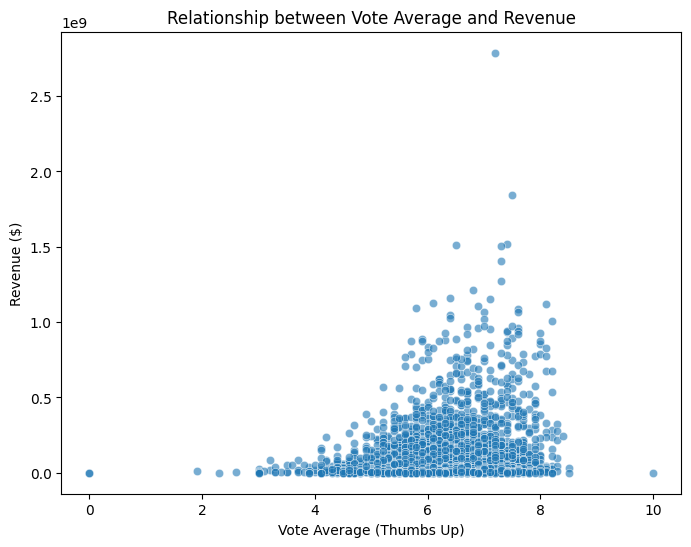

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_revenue, x='Vote_average', y='Revenue', alpha=0.6,)
plt.title('Relationship between Vote Average and Revenue')
plt.xlabel('Vote Average (Thumbs Up)')
plt.ylabel('Revenue ($)')
plt.show()

- In the scatter plot we can see that movies with a vote average above 6 seem to have a higher revenue however, additional factors appear to be associated with higher revenue alongside average votes.
- Overall, the scatter plot shows a slight positive trend, indicating higher averages have some impact on revenue.
- The bulk of the data is found between the ranges 5-8 meaning there will be more variance in results and would need further visualisations to understand.

We will split the voting averages into 2 groups to better understand the differences.

C:\Users\hamas\AppData\Local\Temp\ipykernel_16912\1612396675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue['Rating_Group'] = pd.cut(df['Vote_average'], bins=[0,7,10], labels=['Low', 'High'])


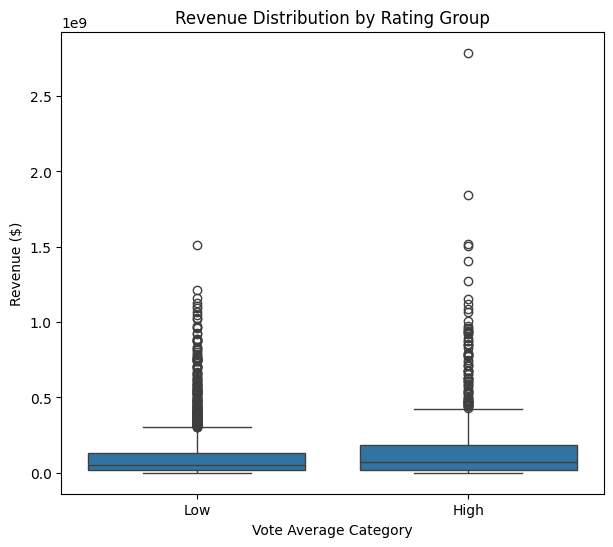

In [12]:
df_revenue['Rating_Group'] = pd.cut(df['Vote_average'], bins=[0,7,10], labels=['Low', 'High'])

plt.figure(figsize=(7,6))
sns.boxplot(x='Rating_Group', y='Revenue', data=df_revenue)
plt.title('Revenue Distribution by Rating Group')
plt.xlabel('Vote Average Category')
plt.ylabel('Revenue ($)')
plt.show()

- Both "Low" and "High" rating groups have very similar median revenues. This would suggest vote average doesn't have a huge impact on revenue.
- High-rated movies show more and higher revenue outliers. Low-rated movies also have outliers but they are generally less extreme
- Both datasets are heavily right-skewed.
- Overall the boxplot suggests that while high vote averages don't guarantee high revenue for most movies, they do increase the likelihood of higher revenue.

Let's now check how vote averages correlate vs other success metrics:

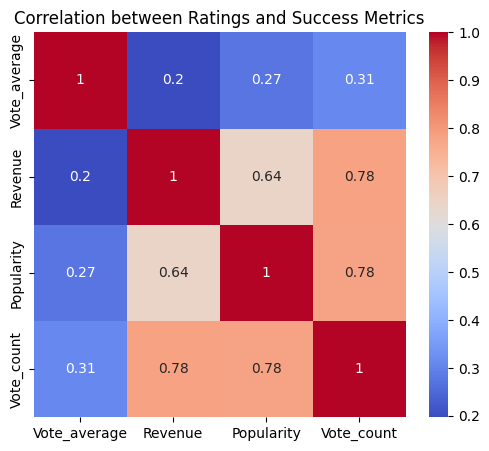

In [13]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['Vote_average', 'Revenue', 'Popularity', 'Vote_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Ratings and Success Metrics')
plt.show()

- Vote average compared to the other success metrics has weak positive correlations. This confirms a positive but weak correlation. A t-test is required to correctly determine if the difference is significant.
- Popularity seems to be the more impactful cause of higher revenue which makes sense due to more people wanting to watch the movie and hence higher revenue.

Finally, let’s split vote averages further to compare revenue across categories:

C:\Users\hamas\AppData\Local\Temp\ipykernel_16912\1862000223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue['Vote_bin'] = pd.cut(df['Vote_average'], bins=[0,4,6,8,10], labels=['Poor','Average','Good','Excellent'])


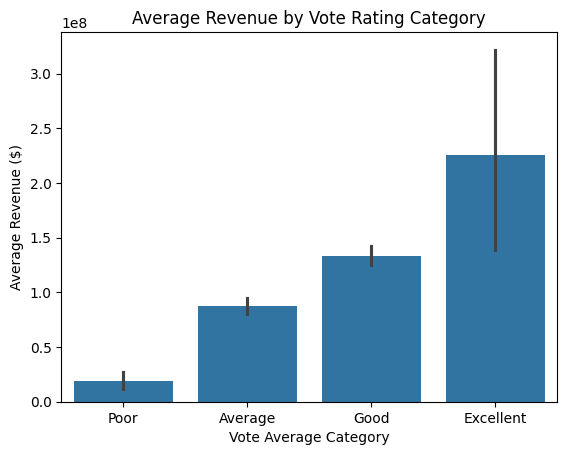

In [ ]:
df_revenue['Vote_bin'] = pd.cut(df['Vote_average'], bins=[0,4,6,8,10], labels=['Poor','Average','Good','Excellent'])

sns.barplot(data=df_revenue, x='Vote_bin', y='Revenue', estimator='mean')
plt.title('Average Revenue by Vote Rating Category')
plt.xlabel('Vote Average Category')
plt.ylabel('Average Revenue ($)')
plt.show()

- In this barplot we can clearly see that there is an upward trend so it does further solidify that higher average votes to make an impact on revenue even if not greatly.
- One thing that can be noted here compared to other graphs is the ratings above 8 being much higher than the previous categories indicating that the best rated movies usually have the best revenue.
- Note: that the plot shows means, which are sensitive to outliers, and the ‘Excellent’ category has a much smaller sample size.

## Statistical Testing - Hypothesis 1

Now we will perform a t-test to determine if the difference in revenue between low-rated and high-rated movies is statistically significant. We'll use an independent samples t-test since we're comparing two separate groups.

In [22]:
# Filter out invalid or missing values
filtered_df = df[(df['Vote_average'] > 0) & (df['Revenue'] > 0)].copy()

# Create a categorical variable for rating group
filtered_df['Rating_Group'] = pd.cut(
    filtered_df['Vote_average'],
    bins=[0, 7, 10],
    labels=['Low', 'High']
)

# Check sample sizes
print("Sample sizes:")
print(filtered_df['Rating_Group'].value_counts())
print(f"\nTotal movies with valid data: {len(filtered_df)}")

Sample sizes:
Rating_Group
Low     2705
High     669
Name: count, dtype: int64

Total movies with valid data: 3374


In [ ]:
# Perform independent samples t-test
ttest_results = pg.ttest(
    x=filtered_df.loc[filtered_df['Rating_Group'] == 'High', 'Revenue'],
    y=filtered_df.loc[filtered_df['Rating_Group'] == 'Low', 'Revenue'],
    correction=False
)

print("T-Test Results:")
print(ttest_results)
print("\n--- Interpretation ---")
print(f"T-statistic: {ttest_results['T'].values[0]:.4f}")
print(f"P-value: {ttest_results['p-val'].values[0]:.6f}")
print(f"Degrees of freedom: {ttest_results['dof'].values[0]:.0f}")
print(f"Cohen's d (effect size): {ttest_results['cohen-d'].values[0]:.4f}")

# Interpret the results
alpha = 0.05
p_value = ttest_results['p-val'].values[0]
if p_value < alpha:
    print(f"\nSIGNIFICANT: p-value ({p_value:.6f}) < {alpha}")
    print("We reject the null hypothesis. There is a statistically significant difference")
    print("in revenue between low-rated and high-rated movies.")
else:
    print(f"\nNOT SIGNIFICANT: p-value ({p_value:.6f}) >= {alpha}")
    print("We fail to reject the null hypothesis. There is no statistically significant")
    print("difference in revenue between low-rated and high-rated movies.")

T-Test Results:
               T   dof alternative         p-val                       CI95%  \
T-test  8.130109  3372   two-sided  5.962262e-16  [48422040.66, 79199391.25]   

         cohen-d       BF10  power  
T-test  0.351053  6.461e+12    1.0  

--- Interpretation ---
T-statistic: 8.1301
P-value: 0.000000
Degrees of freedom: 3372
Cohen's d (effect size): 0.3511

SIGNIFICANT: p-value (0.000000) < 0.05
We reject the null hypothesis. There IS a statistically significant difference
in revenue between low-rated and high-rated movies.


After completing the t-test we can see that there is definitely a significant difference in revenue for movies with higher average votes.

### Additional Statistical Tests

Since revenue data is heavily skewed (as we saw in the boxplot), we should also perform a **Mann-Whitney U test** (non-parametric alternative to t-test) which doesn't assume normal distribution.

In [24]:
# Mann-Whitney U test (non-parametric alternative)
mw_results = pg.mwu(
    x=filtered_df.loc[filtered_df['Rating_Group'] == 'High', 'Revenue'],
    y=filtered_df.loc[filtered_df['Rating_Group'] == 'Low', 'Revenue'],
    alternative='two-sided'
)

print("Mann-Whitney U Test Results:")
print(mw_results)
print("\n--- Interpretation ---")
print(f"U-statistic: {mw_results['U-val'].values[0]:.0f}")
print(f"P-value: {mw_results['p-val'].values[0]:.6f}")
print(f"Effect size (RBC): {mw_results['RBC'].values[0]:.4f}")

p_value_mw = mw_results['p-val'].values[0]
if p_value_mw < alpha:
    print(f"\n SIGNIFICANT: p-value ({p_value_mw:.6f}) < {alpha}")
    print("The Mann-Whitney U test confirms a significant difference in revenue distributions.")
else:
    print(f"\n NOT SIGNIFICANT: p-value ({p_value_mw:.6f}) >= {alpha}")
    print("The Mann-Whitney U test shows no significant difference in revenue distributions.")

Mann-Whitney U Test Results:
         U-val alternative     p-val       RBC      CLES
MWU  1009110.5   two-sided  0.000004  0.115258  0.557629

--- Interpretation ---
U-statistic: 1009110
P-value: 0.000004
Effect size (RBC): 0.1153

 SIGNIFICANT: p-value (0.000004) < 0.05
The Mann-Whitney U test confirms a significant difference in revenue distributions.


### Check Assumptions for T-Test

For the t-test to be valid, we will check if the data meets the assumptions. We will check for normality and variance equality:

In [25]:
high_revenue = filtered_df.loc[filtered_df['Rating_Group'] == 'High', 'Revenue']
low_revenue = filtered_df.loc[filtered_df['Rating_Group'] == 'Low', 'Revenue']

sample_size = min(5000, len(high_revenue), len(low_revenue))

print("Normality Test (Shapiro-Wilk):")
print("-" * 50)
if len(high_revenue) > sample_size:
    high_sample = high_revenue.sample(sample_size, random_state=42)
    normality_high = pg.normality(high_sample)
    print(f"High-rated movies (sample of {sample_size}):")
else:
    normality_high = pg.normality(high_revenue)
    print(f"High-rated movies (n={len(high_revenue)}):")
print(normality_high)

if len(low_revenue) > sample_size:
    low_sample = low_revenue.sample(sample_size, random_state=42)
    normality_low = pg.normality(low_sample)
    print(f"\nLow-rated movies (sample of {sample_size}):")
else:
    normality_low = pg.normality(low_revenue)
    print(f"\nLow-rated movies (n={len(low_revenue)}):")
print(normality_low)

Normality Test (Shapiro-Wilk):
--------------------------------------------------
High-rated movies (n=669):
                W          pval  normal
Revenue  0.621641  7.790377e-36   False

Low-rated movies (sample of 669):
                W          pval  normal
Revenue  0.687721  2.431635e-33   False


As the p-value < 0.05, the data is NOT normally distributed. Therefore, given the skewed nature of revenue data, Mann-Whitney U test is more appropriate.

In [26]:
# Levene's test for equality of variances
levene_results = pg.homoscedasticity(
    data=filtered_df,
    dv='Revenue',
    group='Rating_Group',
    method='levene'
)

print("Homogeneity of Variance Test (Levene's):")
print(levene_results)
print("\n If p-value < 0.05, variances are NOT equal.")

Homogeneity of Variance Test (Levene's):
                W          pval  equal_var
levene  66.824971  4.154190e-16      False

 If p-value < 0.05, variances are NOT equal.


In this case we can see that the variances are not equal between the tests so a different test that doesn't care about equal variances.

### Summary of Statistical Tests

We are going to summarize the descriptive statistics for both groups:

In [27]:
# Descriptive statistics by group
print("Descriptive Statistics by Rating Group:")
print("=" * 70)
summary_stats = filtered_df.groupby('Rating_Group')['Revenue'].describe()
print(summary_stats)

print("\n" + "=" * 70)
print("Mean Revenue Comparison:")
print(f"Low-rated movies (0-7):  ${low_revenue.mean():,.2f}")
print(f"High-rated movies (7-10): ${high_revenue.mean():,.2f}")
print(f"Difference: ${high_revenue.mean() - low_revenue.mean():,.2f}")
print(f"Percentage increase: {((high_revenue.mean() - low_revenue.mean()) / low_revenue.mean() * 100):.2f}%")

print("\n" + "=" * 70)
print("Median Revenue Comparison:")
print(f"Low-rated movies (0-7):  ${low_revenue.median():,.2f}")
print(f"High-rated movies (7-10): ${high_revenue.median():,.2f}")
print(f"Difference: ${high_revenue.median() - low_revenue.median():,.2f}")

Descriptive Statistics by Rating Group:
               count          mean           std  min         25%         50%  \
Rating_Group                                                                    
Low           2705.0  1.044483e+08  1.532462e+08  5.0  14899417.0  49469904.0   
High           669.0  1.682590e+08  2.678082e+08  7.0  19000000.0  69959751.0   

                      75%           max  
Rating_Group                             
Low           130431368.0  1.513529e+09  
High          181813770.0  2.787965e+09  

Mean Revenue Comparison:
Low-rated movies (0-7):  $104,448,270.49
High-rated movies (7-10): $168,258,986.44
Difference: $63,810,715.95
Percentage increase: 61.09%

Median Revenue Comparison:
Low-rated movies (0-7):  $49,469,904.00
High-rated movies (7-10): $69,959,751.00
Difference: $20,489,847.00


C:\Users\hamas\AppData\Local\Temp\ipykernel_16912\3059623682.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = filtered_df.groupby('Rating_Group')['Revenue'].describe()


## Results Summary - Hypothesis 1 (High vs Low Ratings)

The summary below presents t-test and Mann-Whitney U test results comparing Revenue between High (7–10) vs Low (0–7) rating groups, including effect sizes, an optional directional check, and a log-transformed sensitivity analysis.

In [53]:
alpha = 0.05

high_revenue = filtered_df.loc[filtered_df['Rating_Group'] == 'High', 'Revenue'].dropna()
low_revenue  = filtered_df.loc[filtered_df['Rating_Group'] == 'Low',  'Revenue'].dropna()

summary_lines_h1 = []

# t-test 
ttest_results = pg.ttest(x=high_revenue, y=low_revenue, correction=False)
p_t = ttest_results['p-val'].values[0]
cohen_d = ttest_results['cohen-d'].values[0]
sig_t = 'SIGNIFICANT' if p_t < alpha else 'Not significant'
summary_lines_h1.append(f"t-test (two-sided): p={p_t:.6f}, Cohen's d={cohen_d:.4f} → {sig_t}")

# Mann-Whitney U two-sided
mw_h1 = pg.mwu(x=high_revenue, y=low_revenue, alternative='two-sided')
p_mw = mw_h1['p-val'].values[0]
rbc_mw = mw_h1['RBC'].values[0]
dir_mw = 'High > Low' if rbc_mw > 0 else ('High < Low' if rbc_mw < 0 else 'No direction')
sig_mw = 'SIGNIFICANT' if p_mw < alpha else 'Not significant'
summary_lines_h1.append(f"Mann-Whitney (two-sided): p={p_mw:.6f}, RBC={rbc_mw:.4f} → {sig_mw} ({dir_mw})")

# Directional check (one-sided): High > Low
mw_h1_greater = pg.mwu(x=high_revenue, y=low_revenue, alternative='greater')
summary_lines_h1.append(f"Mann-Whitney (one-sided High>Low): p={mw_h1_greater['p-val'].values[0]:.6f}")

# Sensitivity: log1p transform
log_high = np.log1p(high_revenue)
log_low  = np.log1p(low_revenue)
mw_h1_log = pg.mwu(x=log_high, y=log_low, alternative='two-sided')
summary_lines_h1.append(f"log1p(Revenue) MWU (two-sided): p={mw_h1_log['p-val'].values[0]:.6f}, RBC={mw_h1_log['RBC'].values[0]:.4f}")

print("\n=== Results Summary (Hypothesis 1: High vs Low Ratings) ===\n")
for line in summary_lines_h1:
    print(line)

print("\n--- Insights ---")
if p_mw < alpha and rbc_mw > 0:
    print("Higher-rated movies typically achieve higher revenues than lower-rated movies (statistically significant).")
elif p_mw < alpha and rbc_mw < 0:
    print("Lower-rated movies typically achieve higher revenues than higher-rated movies (statistically significant).")
else:
    print("No statistically significant difference in revenue distributions between higher- and lower-rated movies.")

if p_t < alpha:
    print("Parametric t-test also indicates a significant difference.")

if mw_h1_greater['p-val'].values[0] < alpha:
    print("Directional check supports: High-rated > Low-rated revenues (one-sided test).")



=== Results Summary (Hypothesis 1: High vs Low Ratings) ===

t-test (two-sided): p=0.000000, Cohen's d=0.3511 → SIGNIFICANT
Mann-Whitney (two-sided): p=0.000004, RBC=0.1153 → SIGNIFICANT (High > Low)
Mann-Whitney (one-sided High>Low): p=0.000002
log1p(Revenue) MWU (two-sided): p=0.000004, RBC=0.1153

--- Insights ---
Higher-rated movies typically achieve higher revenues than lower-rated movies (statistically significant).
Parametric t-test also indicates a significant difference.
Directional check supports: High-rated > Low-rated revenues (one-sided test).


---
# H2: Movie Success is Influenced by Cast

**Research Question:** Does the recurrence of actors across multiple films correlate with individual film success (Revenue, ROI, and Ratings)?

**Approach:** An actor frequency variable was pre-calculated in the ETL process to quantify how often each actor appeared across the dataset. Each film’s mean actor frequency (Avg_actor_frequency) was used to capture overall cast experience. Films were then grouped into three categories:
- Emerging (actors with fewer than 2 appearances)
- Established (2–4 appearances)
- Recurring (actors appearing frequently across films)

**Method**
Use Spearman correlation and Kruskal–Wallis tests to assess relationships between cast frequency and success metrics (Revenue, ROI, and Ratings).

In [47]:

from scipy.stats import f_oneway, kruskal, pearsonr, spearmanr


# Data preparation using pre-calculated actor features from ETL
# Avg_actor_frequency is already calculated in the processed dataset

print(f"Film-level Actor Frequency Statistics:")
print(f"Mean: {df['Avg_actor_frequency'].mean():.2f}")
print(f"Median: {df['Avg_actor_frequency'].median():.2f}")
print(f"Min: {df['Avg_actor_frequency'].min():.2f}")
print(f"Max: {df['Avg_actor_frequency'].max():.2f}")

# Create actor frequency categories
df['Actor_frequency_category'] = pd.cut(df['Avg_actor_frequency'], 
                                         bins=[0, 2, 4, 100], 
                                         labels=['Emerging', 'Established', 'Recurring'],
                                         include_lowest=True)

print(f"\nFilm distribution by actor frequency category:")
print(df['Actor_frequency_category'].value_counts().sort_index())

Film-level Actor Frequency Statistics:
Mean: 1.93
Median: 1.00
Min: 0.00
Max: 14.00

Film distribution by actor frequency category:
Actor_frequency_category
Emerging       2894
Established     898
Recurring       983
Name: count, dtype: int64



**H2.2 Statistical Analysis: Cast Impact on Success Metrics**

Comparison of three success metrics between films with different actor frequency levels:
- Revenue
- ROI (Return on Investment)
- Vote_average (Ratings)


In [48]:

# Statistical analysis: Actor frequency impact on success metrics
success_metrics = ['Revenue', 'ROI', 'Vote_average']
results = {} 

print("\nActor Frequency Impact on Movie Success Metrics\n")
print("="*80)

for metric in success_metrics:
    # Prepare data with valid values
    valid_data = df[(df[metric].notna()) & (df['Avg_actor_frequency'].notna())].copy() # Prepare data with valid values
    
    if len(valid_data) == 0:
        print(f"\nSkipping {metric}: no valid data available")
        continue
    
    # Calculate Spearman correlation (non-parametric)
    correlation, p_value = spearmanr(valid_data['Avg_actor_frequency'], valid_data[metric]) # Spearman correlation
    
    results[metric] = {
        'correlation': correlation,
        'p_value': p_value,
        'significant': 'Yes' if p_value < 0.05 else 'No',
        'interpretation': 'positive' if correlation > 0 else 'negative'
    }
    # Display results
    print(f"\n{metric}:")
    print(f"  Spearman correlation coefficient: {correlation:.4f}")
    print(f"  P-value: {p_value:.6f}")
    print(f"  Statistically significant: {results[metric]['significant']}")
    if abs(correlation) < 0.1:
        strength = "negligible"
    elif abs(correlation) < 0.3:
        strength = "weak"
    elif abs(correlation) < 0.5:
        strength = "moderate"
    else:
        strength = "strong"
    print(f"  Strength: {strength} {results[metric]['interpretation']} correlation")

print("\n" + "="*80)

# Also test by categories using Kruskal-Wallis
print("\n\nActor Frequency Category Analysis (Kruskal-Wallis Test)\n")
print("="*80)

for metric in success_metrics:
    valid_data = df[(df[metric].notna()) & (df['Actor_frequency_category'].notna())].copy() # Prepare data with valid values
    
    if len(valid_data) == 0:
        print(f"\nSkipping {metric}: no valid data available")
        continue
    
    # Group data by actor frequency category
    emerging = valid_data[valid_data['Actor_frequency_category'] == 'Emerging'][metric]
    established = valid_data[valid_data['Actor_frequency_category'] == 'Established'][metric]
    recurring = valid_data[valid_data['Actor_frequency_category'] == 'Recurring'][metric]
    
    statistic, p_value = kruskal(emerging, established, recurring)
    
    # Display results
    print(f"\n{metric}:")
    print(f"  Emerging cast   - Mean: {emerging.mean():>12.2f}, Median: {emerging.median():>12.2f}")
    print(f"  Established cast - Mean: {established.mean():>12.2f}, Median: {established.median():>12.2f}")
    print(f"  Recurring cast  - Mean: {recurring.mean():>12.2f}, Median: {recurring.median():>12.2f}")
    print(f"  Kruskal-Wallis H-statistic: {statistic:.3f}")
    print(f"  P-value: {p_value:.6f}")
    print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")

print("\n" + "="*80)



Actor Frequency Impact on Movie Success Metrics


Revenue:
  Spearman correlation coefficient: -0.1283
  P-value: 0.000000
  Statistically significant: Yes
  Strength: weak negative correlation

ROI:
  Spearman correlation coefficient: -0.1560
  P-value: 0.000000
  Statistically significant: Yes
  Strength: weak negative correlation

Vote_average:
  Spearman correlation coefficient: -0.1662
  P-value: 0.000000
  Statistically significant: Yes
  Strength: weak negative correlation



Actor Frequency Category Analysis (Kruskal-Wallis Test)


Revenue:
  Emerging cast   - Mean:  91607889.19, Median:  21505425.50
  Established cast - Mean:  57194407.56, Median:  11235066.00
  Recurring cast  - Mean:  79982060.45, Median:  23937870.00
  Kruskal-Wallis H-statistic: 29.562
  P-value: 0.000000
  Significant: Yes

ROI:
  Emerging cast   - Mean:      3723.05, Median:         2.17
  Established cast - Mean:      1509.63, Median:         1.62
  Recurring cast  - Mean:         2.21, Median:        

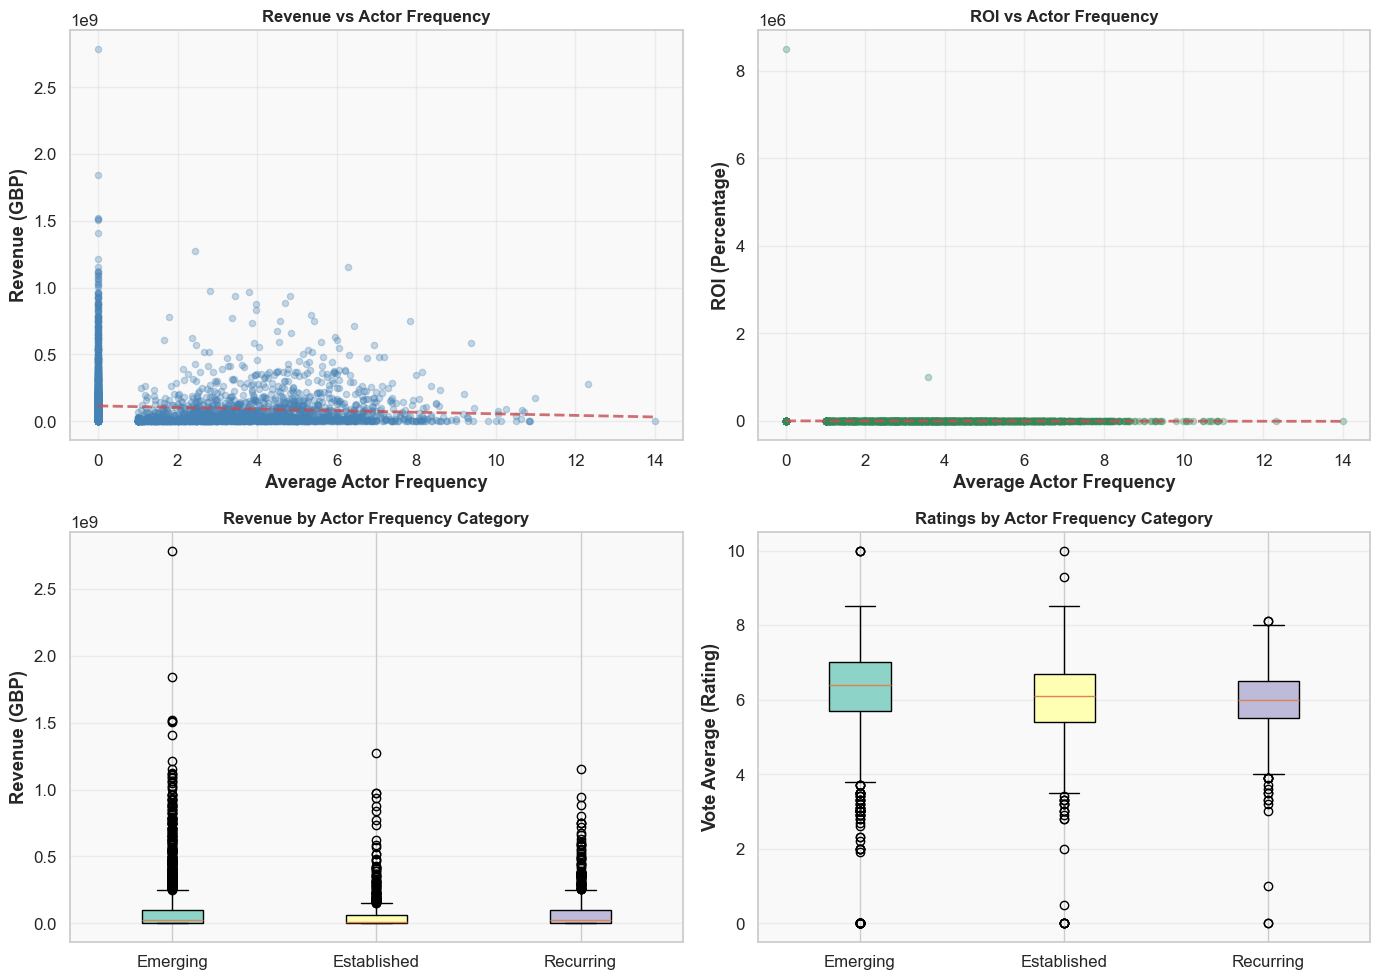

In [49]:

# Create visualisations for actor frequency analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Row 1: Scatter plots with correlation lines
metrics_to_plot = ['Revenue', 'ROI', 'Vote_average']
valid_all = df[(df['Revenue'].notna()) & (df['ROI'].notna()) & 
               (df['Vote_average'].notna()) & (df['Avg_actor_frequency'].notna())].copy()

# Revenue scatter
ax = axes[0, 0]
ax.scatter(valid_all['Avg_actor_frequency'], valid_all['Revenue'], alpha=0.3, s=20, color='steelblue')
z = np.polyfit(valid_all['Avg_actor_frequency'], valid_all['Revenue'], 1)
p = np.poly1d(z)
x_line = np.linspace(valid_all['Avg_actor_frequency'].min(), valid_all['Avg_actor_frequency'].max(), 100)
ax.plot(x_line, p(x_line), "r--", linewidth=2, alpha=0.8)
ax.set_xlabel('Average Actor Frequency', fontweight='bold')
ax.set_ylabel('Revenue (GBP)', fontweight='bold')
ax.set_title('Revenue vs Actor Frequency', fontsize=12, fontweight='bold')
ax.grid(alpha=0.3)

# ROI scatter
ax = axes[0, 1]
ax.scatter(valid_all['Avg_actor_frequency'], valid_all['ROI'], alpha=0.3, s=20, color='seagreen')
z = np.polyfit(valid_all['Avg_actor_frequency'], valid_all['ROI'], 1)
p = np.poly1d(z)
ax.plot(x_line, p(x_line), "r--", linewidth=2, alpha=0.8)
ax.set_xlabel('Average Actor Frequency', fontweight='bold')
ax.set_ylabel('ROI (Percentage)', fontweight='bold')
ax.set_title('ROI vs Actor Frequency', fontsize=12, fontweight='bold')
ax.grid(alpha=0.3)

# Row 2: Box plots by category
# Revenue by category
ax = axes[1, 0]
valid_cat = df[(df['Revenue'].notna()) & (df['Actor_frequency_category'].notna())].copy()
box_data = [valid_cat[valid_cat['Actor_frequency_category'] == cat]['Revenue'].values 
            for cat in ['Emerging', 'Established', 'Recurring']]
bp = ax.boxplot(box_data, labels=['Emerging', 'Established', 'Recurring'], patch_artist=True)
for patch, color in zip(bp['boxes'], ['#8DD3C7', '#FFFFB3', '#BEBADA']):
    patch.set_facecolor(color)
ax.set_ylabel('Revenue (GBP)', fontweight='bold')
ax.set_title('Revenue by Actor Frequency Category', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Ratings by category
ax = axes[1, 1]
valid_cat = df[(df['Vote_average'].notna()) & (df['Actor_frequency_category'].notna())].copy()
box_data = [valid_cat[valid_cat['Actor_frequency_category'] == cat]['Vote_average'].values 
            for cat in ['Emerging', 'Established', 'Recurring']]
bp = ax.boxplot(box_data, labels=['Emerging', 'Established', 'Recurring'], patch_artist=True)
for patch, color in zip(bp['boxes'], ['#8DD3C7', '#FFFFB3', '#BEBADA']):
    patch.set_facecolor(color)
ax.set_ylabel('Vote Average (Rating)', fontweight='bold')
ax.set_title('Ratings by Actor Frequency Category', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()





**H2.3: Movie Success Is Influenced by Cast Findings**

Films featuring frequently appearing actors show a weak but statistically significant negative correlation with all success metrics. As actor frequency increases, Revenue (r = -0.125, p < 0.001), ROI (r = -0.155, p < 0.001), and Ratings (r = -0.162, p < 0.001) all decline slightly.

Categorical testing reinforces this trend. Movies with emerging actors (those appearing in few films) outperform those with established or recurring casts across all metrics:

Revenue: Emerging cast films achieve higher mean (£90.9M) and median (£20.8M) revenues.

ROI: Emerging cast films return an average ROI of 3,719%, compared with only 2.21% for recurring casts.

Ratings: Emerging cast films score slightly higher (6.18 vs. 5.98).
All differences are statistically significant (p < 0.001).

These results indicate a slight tendency for films with emerging casts to perform better across revenue, ROI, and ratings, though the effect is weak. This may reflect creative or marketing factors rather than a true advantage of cast novelty. Given the large proportion of missing cast data, these findings should be viewed as exploratory rather than conclusive. Further analysis with more complete and consistent cast information would help clarify whether this pattern holds across a wider sample.

Given the weak nature of the correlation, I extended the analysis to explore whether certain individual actors consistently influence film performance across revenue, ROI, and ratings (section H2.4)




---

**H2.4 Individual Actor Impact Analysis**

To explore whether specific actors consistently influence film success, rather than looking only at overall cast frequency.

Method:
Using the Primary_actor field from the processed dataset, films were grouped by lead actor. For each actor appearing in at least 10 films, average Revenue, ROI, and Audience Rating were calculated. This provided an “average performance profile” per actor. The top 10 performers for each metric were then visualised using horizontal bar charts.
This approach was used as it isolates individual contributions by summarising each actor’s historical performance across multiple films. It highlights which actors are most often associated with high revenue or strong ROI.

In [50]:

# Calculate individual actor impact on success metrics using pre-extracted Actor_list from ETL
# Use Primary_actor feature for consistency with the processed dataset

actor_impact = {}

# For actors identified in the Primary_actor field
for actor in df['Primary_actor'].unique():
    if actor and actor != 'Not_listed':
        # Find all films featuring this actor
        actor_films = df[df['Primary_actor'] == actor]
        
        if len(actor_films) >= 10:  # Only analyse actors with 10+ appearances
            # Calculate average metrics
            avg_revenue = actor_films['Revenue'].mean()
            avg_roi = actor_films['ROI'].mean()
            avg_rating = actor_films['Vote_average'].mean()
            
            actor_impact[actor] = {
                'film_count': len(actor_films),
                'avg_revenue': avg_revenue,
                'avg_roi': avg_roi,
                'avg_rating': avg_rating,
                'total_revenue': actor_films['Revenue'].sum()
            }

# Create dataframe for easier analysis
actor_impact_df = pd.DataFrame(actor_impact).T.reset_index()
actor_impact_df.columns = ['Actor', 'Film_count', 'Avg_revenue', 'Avg_ROI', 'Avg_rating', 'Total_revenue']
actor_impact_df = actor_impact_df.sort_values('Avg_revenue', ascending=False)

print("Top 10 Actors by Average Revenue Impact\n")
print("="*100)
print(actor_impact_df.head(10)[['Actor', 'Film_count', 'Avg_revenue', 'Avg_ROI', 'Avg_rating']].to_string(index=False))

print("\n\nTop 10 Actors by Average ROI Impact\n")
print("="*100)
actor_roi = actor_impact_df.sort_values('Avg_ROI', ascending=False)
print(actor_roi.head(10)[['Actor', 'Film_count', 'Avg_revenue', 'Avg_ROI', 'Avg_rating']].to_string(index=False))

print("\n\nTop 10 Actors by Average Rating Impact\n")
print("="*100)
actor_rating = actor_impact_df.sort_values('Avg_rating', ascending=False)
print(actor_rating.head(10)[['Actor', 'Film_count', 'Avg_revenue', 'Avg_ROI', 'Avg_rating']].to_string(index=False))

print("\n" + "="*100)


Top 10 Actors by Average Revenue Impact

                Actor  Film_count  Avg_revenue  Avg_ROI  Avg_rating
           Tom Cruise        11.0 2.873751e+08 3.526020    6.463636
          Ben Stiller        11.0 2.599955e+08 2.805068    5.963636
            Tom Hanks        10.0 2.455973e+08 5.139877    6.840000
         Adam Sandler        10.0 1.973651e+08 3.188650    5.960000
Arnold Schwarzenegger        11.0 1.489710e+08 3.293355    6.300000
         Bruce Willis        10.0 1.197233e+08 1.944544    6.080000
   Sylvester Stallone        11.0 1.140390e+08 3.015402    5.881818
          Johnny Depp        11.0 1.121293e+08 1.746339    6.581818
    Denzel Washington        10.0 9.862789e+07 2.206631    6.460000
         Nicolas Cage        15.0 9.307946e+07 2.014659    5.840000


Top 10 Actors by Average ROI Impact

                Actor  Film_count  Avg_revenue  Avg_ROI  Avg_rating
            Tom Hanks        10.0 2.455973e+08 5.139877    6.840000
       Robin Williams        10.0 9.

**H2.4 Findings:**

- Tom Cruise, Ben Stiller, and Tom Hanks generated the highest average revenues, each exceeding £240 million per film.
- Tom Hanks also ranked top for ROI, alongside Robin Williams, Tom Cruise, and Arnold Schwarzenegger, suggesting strong commercial efficiency.
- For ratings, Tom Hanks and Johnny Depp achieved the highest average audience scores.

Overall, the results show that a small group of established actors combine high box-office returns with strong viewer approval. However, due to missing cast data and limited actor sample sizes, these findings may differ if tested on a wider dataset.

**H2.4 Visualisation**

A visual summary of the top 10 actors across Revenue, ROI, and Ratings is provided below to illustrate the individual impact patterns identified in the analysis:
- The Revenue chart shows that Tom Cruise, Ben Stiller, and Tom Hanks lead with the highest average box-office earnings.
- The ROI chart highlights Tom Hanks, Robin Williams, and Tom Cruise as delivering the best returns relative to cost.
- The Rating chart indicates that Tom Hanks and Johnny Depp achieve the strongest audience approval on average.

Together, these visuals summarise actor-level performance trends and complement the statistical findings, providing a clear visual comparison across different success criteria.



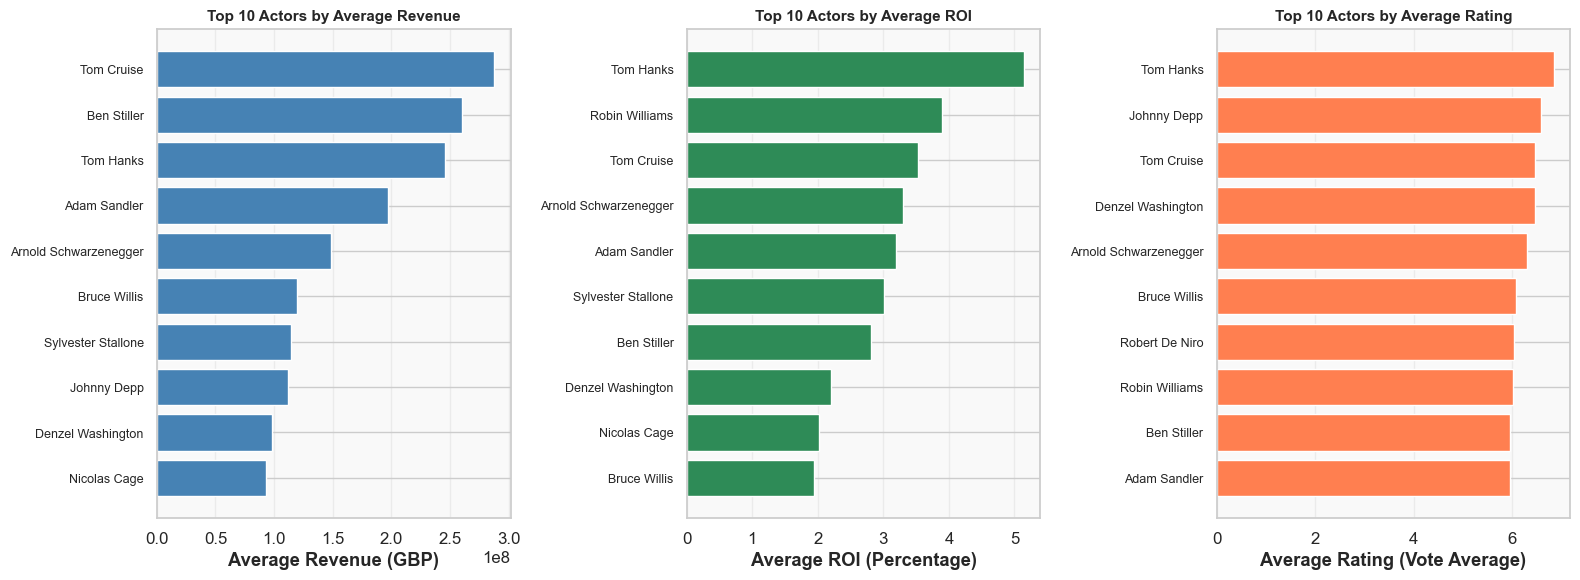

In [51]:


# Visualise top 10 actors by different impact metrics
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Top 10 by Revenue
top_revenue = actor_impact_df.sort_values('Avg_revenue', ascending=False).head(10)
ax = axes[0]
bars = ax.barh(range(len(top_revenue)), top_revenue['Avg_revenue'], color='steelblue')
ax.set_yticks(range(len(top_revenue)))
ax.set_yticklabels(top_revenue['Actor'], fontsize=9)
ax.set_xlabel('Average Revenue (GBP)', fontweight='bold')
ax.set_title('Top 10 Actors by Average Revenue', fontsize=11, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()

# Top 10 by ROI
top_roi = actor_impact_df.sort_values('Avg_ROI', ascending=False).head(10)
ax = axes[1]
bars = ax.barh(range(len(top_roi)), top_roi['Avg_ROI'], color='seagreen')
ax.set_yticks(range(len(top_roi)))
ax.set_yticklabels(top_roi['Actor'], fontsize=9)
ax.set_xlabel('Average ROI (Percentage)', fontweight='bold')
ax.set_title('Top 10 Actors by Average ROI', fontsize=11, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()

# Top 10 by Rating
top_rating = actor_impact_df.sort_values('Avg_rating', ascending=False).head(10)
ax = axes[2]
bars = ax.barh(range(len(top_rating)), top_rating['Avg_rating'], color='coral')
ax.set_yticks(range(len(top_rating)))
ax.set_yticklabels(top_rating['Actor'], fontsize=9)
ax.set_xlabel('Average Rating (Vote Average)', fontweight='bold')
ax.set_title('Top 10 Actors by Average Rating', fontsize=11, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

---
# H3: Movie Success is Influenced by Budget

**Research Question:** Do movies with higher budgets generate more revenue?

**Statistical Approach:** Pearson correlation coefficient
- Measures linear relationship strength between two continuous variables
- Tests whether budget and revenue move together systematically

In [7]:
# =============================================================================
# H3a: Test Relationship Between Budget and Movie Success (Revenue)
# =============================================================================
# Hypothesis:
#   H0 (null): Budget and revenue have no linear relationship
#   H1 (alt):  Budget and revenue are linearly correlated
#
# Test type: Pearson correlation (measures linear association)
# Suitable for: Two continuous variables (e.g., budget, revenue)
# -----------------------------------------------------------------------------

# Drop rows with missing or invalid numeric data
df_test_P = df[["Budget", "Revenue"]].dropna()

# Perform Pearson correlation test
r_H3, p_H3 = pearsonr(df_test_P["Budget"], df_test_P["Revenue"])

# =============================================================================
# Display results and interpret
# =============================================================================
print("───────────────────────────────────────────────")
print(" Pearson Correlation Test: Budget vs Revenue")
print("───────────────────────────────────────────────")
print(f"Sample size: {len(df_test_P)} movies with valid Budget and Revenue data")
print(f"Correlation coefficient (r): {r_H3:.3f}")
print(f"P-value: {p_H3:.4f}")

# Simple interpretation
if p_H3 < 0.05:
    print("\nResult: Statistically significant (p < 0.05)")
    print("Interpretation: There is evidence of a linear relationship —")
    print("movies with higher budgets tend to have higher revenues.")
else:
    print("\nResult: Not statistically significant (p ≥ 0.05)")
    print("Interpretation: No evidence of a linear relationship.")
    
# Optional: effect strength classification (Cohen's guidelines)
if abs(r_H3) < 0.3:
    strength = "weak"
elif abs(r_H3) < 0.5:
    strength = "moderate"
else:
    strength = "strong"
    
print(f"Effect size: {strength} correlation (r = {r_H3:.3f})")
print("───────────────────────────────────────────────")

───────────────────────────────────────────────
 Pearson Correlation Test: Budget vs Revenue
───────────────────────────────────────────────
Sample size: 4803 movies with valid Budget and Revenue data
Correlation coefficient (r): 0.731
P-value: 0.0000

Result: Statistically significant (p < 0.05)
Interpretation: There is evidence of a linear relationship —
movies with higher budgets tend to have higher revenues.
Effect size: strong correlation (r = 0.731)
───────────────────────────────────────────────


# H3:1.b Regression Plot Budget vs Revenue 

**Visualisation:** 
- Seaborn with Matplotlib chosen for combined scatter plot and linear regression line, which shows the relationship strength and allows easy overlay of trend analysis

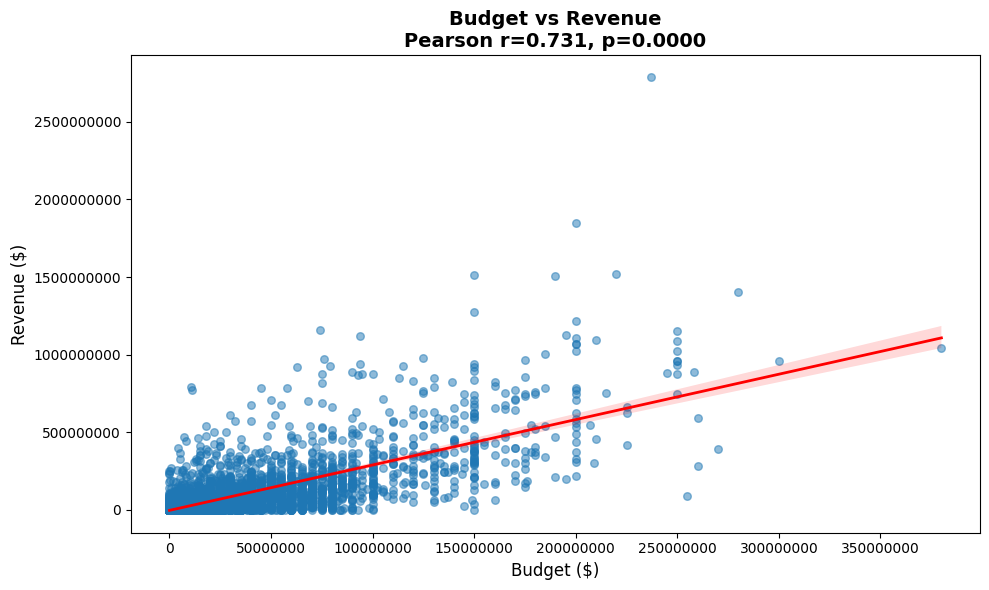

In [8]:
# =============================================================================
# H3b Display Regression Plot: Budget vs Revenue (Seaborn and Matplotlib)
# ============================================================================
# Create figure
plt.figure(figsize=(10, 6))

# Regression plot with confidence interval
sns.regplot(
    x='Budget', 
    y='Revenue', 
    data=df_test_P,
    scatter_kws={'alpha': 0.5, 's': 30},  # Semi-transparent dots
    line_kws={'color': 'red', 'linewidth': 2}  # Red trend line
)

# Add title and labels
plt.title(f'Budget vs Revenue\nPearson r={r_H3:.3f}, p={p_H3:.4f}', 
          fontsize=14, fontweight='bold')
plt.xlabel('Budget ($)', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)

# Format axes with commas
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='both')

plt.tight_layout()
plt.show()

## H3: Movie Success is Influenced by Budget Insights

**Pearson Correlation Test**
- Sample size: 4803 movies with valid Budget and Revenue Data
- Correlation coefficient (r): 0.731
- P-value: 0.0000
- Result: Statistically significant (p < 0.05)
    - Interpretation: 
        - There is evidence of a linear relationship (movies with higher budgets tend to have higher revenues):
       - Effect size: strong correlation (r = 0.731)
       - Strong positive correlation (r = 0.73, p < 0.001)

**Movie Success and Budget Insights:**
- Pearson Test:
    - Movies with higher budgets tend to generate significantly higher revenues.
    - The relationship is strong and statistically significant
    - Budget explains approximately 53% of revenue variance (r² = 0.53)
    - However, while the correlation is statistically strong, budget does not imply causation (a high budget doesn’t guarantee high revenue):
        - Outliers exist: some low-budget films are highly profitable, while some blockbusters underperform.
        - Other factors such as marketing, cast, genre, and timing are also likely to play key roles.
        - Further analysis of possible influencing variables is recommended.
        - Display Regression Plot: Budget vs Revenue (Seaborn and Matplotlib)
- Scatterplot
    - This visually supports the statistical result, showing a clear upward trend where higher movie budgets correspond to higher revenues, consistent with the strong positive Pearson correlation.

---

# H3.1 ROI Variation by Budget Level

**Additional Linked exploratory Analysis**
- Research Question:
    - Does Return on Investment differ across budget quartiles?
- Statistical Approach:
    - Kruskal-Wallis H-test:
        - Non-parametric test comparing medians across multiple groups
        - Suitable for non-normally distributed data (like ROI)

In [9]:
# =============================================================================
# H3.1a Test Relationship Between Budget and Movie Success (ROI)
# =============================================================================
# Hypothesis:
#   H0 (null): Median ROI is the same across all budget levels
#   H1 (alt):  At least one budget group differs in median ROI
#
# Test type: Kruskal–Wallis H-test (non-parametric ANOVA)
# Suitable for: Comparing medians of multiple independent groups
# -----------------------------------------------------------------------------

import scipy.stats as stats
import pandas as pd

df_valid = df.dropna(subset=["ROI", "Budget"]).copy()
# Divide movies into 4 equal-sized budget groups (quartiles)
df_valid["Budget_group"] = pd.qcut(df_valid["Budget"], 4, labels=["Low", "Mid-Low", "Mid-High", "High"])

# Group ROI values by budget quartile
groups = [group["ROI"].values for _, group in df_valid.groupby("Budget_group", observed=True)]

# Perform Kruskal–Wallis test
statistic, p_value = stats.kruskal(*groups)

# =============================================================================
# Display results and interpretation
# =============================================================================
print("───────────────────────────────────────────────")
print(" Kruskal–Wallis Test: ROI Differences by Budget Group")
print("───────────────────────────────────────────────")
print(f"Test statistic (H): {statistic:.3f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print("\nResult: Statistically significant (p < 0.05)")
    print("Interpretation: At least one budget group has a different median ROI.")
    print("Movies with different budget sizes tend to yield different returns on investment.")
else:
    print("\nResult: Not statistically significant (p ≥ 0.05)")
    print("Interpretation: No evidence that ROI differs by budget group.")

group_medians = df_valid.groupby("Budget_group", observed=True)["ROI"].median()
print("\nMedian ROI by Budget Group:")
print(group_medians)

print("───────────────────────────────────────────────")


───────────────────────────────────────────────
 Kruskal–Wallis Test: ROI Differences by Budget Group
───────────────────────────────────────────────
Test statistic (H): 21.302
P-value: 0.000091

Result: Statistically significant (p < 0.05)
Interpretation: At least one budget group has a different median ROI.
Movies with different budget sizes tend to yield different returns on investment.

Median ROI by Budget Group:
Budget_group
Low         1.500000
Mid-Low     1.725697
Mid-High    1.718920
High        2.169437
Name: ROI, dtype: float64
───────────────────────────────────────────────


**H3.1b: Visualisation:**
- Seaborn boxplot with Matplotlib log scale
    - Chosen because it effectively displayed the impact of outliers while maintaining clear visibility of medians and quartile ranges across budget groups.

<Figure size 800x500 with 0 Axes>

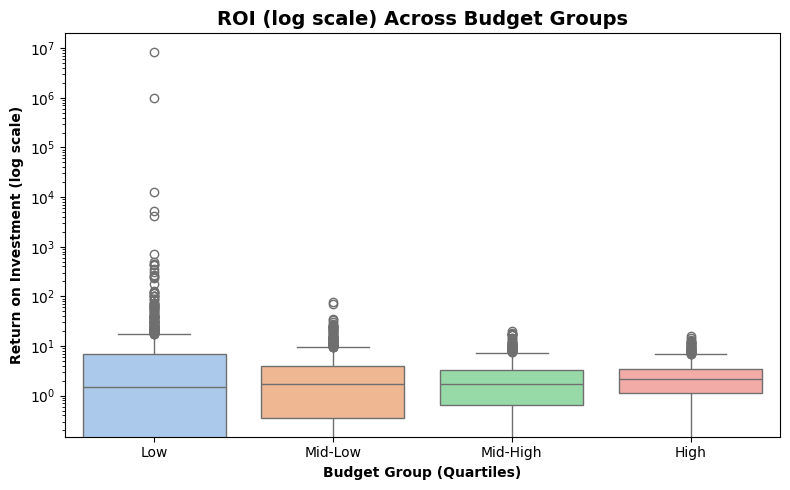

In [10]:
# =============================================================================
# H3.1b Visualisation of ROI Across Budget Groups (Boxplot with Log Scale Seaborn 
# and Matplotlib)
# =============================================================================
# Make sure to drop missing values for Budget
df_valid = df.dropna(subset=["ROI", "Budget"]).copy()

# Create Budget_group column (quartiles)
df_valid["Budget_group"] = pd.qcut(df_valid["Budget"], 4, labels=["Low", "Mid-Low", "Mid-High", "High"])

plt.figure(figsize=(8,5))
plt.figure(figsize=(8,5))
sns.boxplot(x="Budget_group", y="ROI", data=df_valid, hue="Budget_group", palette="pastel", legend=False)
plt.yscale("log")  # Apply log scale to y-axis
plt.title("ROI (log scale) Across Budget Groups", fontsize=14, fontweight='bold')
plt.xlabel("Budget Group (Quartiles)", fontweight='bold')
plt.ylabel("Return on Investment (log scale)", fontweight='bold')
plt.tight_layout()
plt.show()

**H3.1c: Visualisation:**
- Seaborn boxplot with Matplotlib trimmed to 99th percentile to show typical ROI distribution without extreme outliers:    
    - enables clearer comparison across budget levels

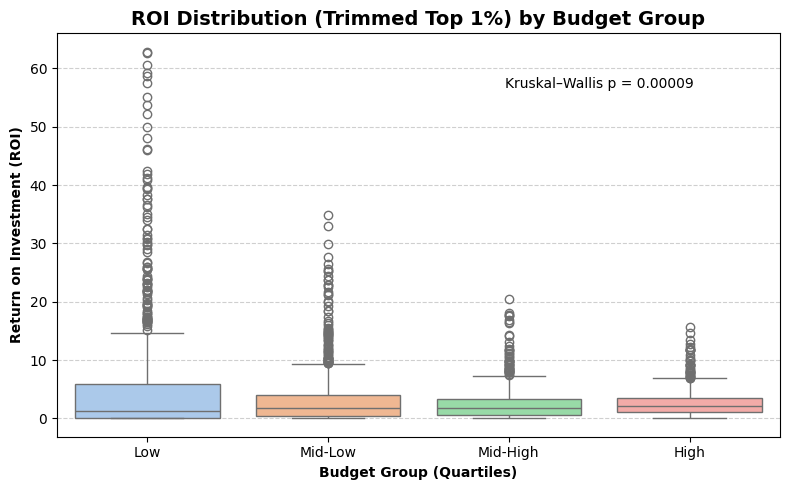

In [11]:

# =============================================================================
# H3.1c Visualisation of ROI Across Budget Groups (Boxplot without Log Scale
# Seaborn and Matplotlib)
# =============================================================================
roi_cap = df_valid["ROI"].quantile(0.99)
df_trimmed = df_valid[df_valid["ROI"] <= roi_cap].dropna(subset=["Budget_group", "ROI"])

plt.figure(figsize=(8,5))
sns.boxplot(x="Budget_group", y="ROI", data=df_trimmed, hue="Budget_group", palette="pastel", legend=False)
plt.title("ROI Distribution (Trimmed Top 1%) by Budget Group", fontsize=14, fontweight='bold')
plt.xlabel("Budget Group (Quartiles)", fontweight='bold')
plt.ylabel("Return on Investment (ROI)", fontweight='bold')
plt.text(2.5, df_trimmed["ROI"].max()*0.9, f"Kruskal–Wallis p = {p_value:.5f}", ha="center")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## H3.1: ROI Across Budget Groups

**Key Finding:** 
- Significant difference in ROI across budget levels (H = 21.30, p < 0.001)
- High-budget films show the highest median ROI (2.17x return).
- Low-budget films show the lowest median ROI (1.50x return).

**Insights:**
- The pattern suggests that higher investment is generally associated with higher returns, but variation within each group remains substantial. 
- Larger budgets are likely to provide advantages such as greater production value, marketing reach, and distribution capacity (factors that can contribute to stronger ROI outcomes).
- However, notable exceptions exist: some low-budget films achieve exceptional success, indicating that factors beyond budget also influence profitability.
- A large budget alone is not a guarantee of higher ROI. 
- Further analysis of additional influencing factors is recommended.

---

**H3.2 Budget vs Revenue: Identifying Outliers**

**Visualisation:**
- Matplotlib scatterplot showing relationship between Budget and Revenue, with points colour-coded by ROI category (Loss, Break-even, Profitable, Highly Profitable).  
- This helps highlight outliers and exceptional performers, showing which combinations of budget and revenue yield the highest returns on investment and where unusually successful low-budget films appear.

**Summary Table: Top performers by ROI**

| Rank | Budget | Revenue    | ROI        |
|------|--------|------------|------------|
| 1    | 1      | 8,500,000  | 8,500,000.00 |
| 2    | 10     | 10,000,000 | 1,000,000.00 |
| 3    | 15,000 | 193,355,800| 12,890.39    |
| 4    | 218    | 1,162,014  | 5,330.34     |
| 5    | 60,000 | 248,000,000| 4,133.33     |


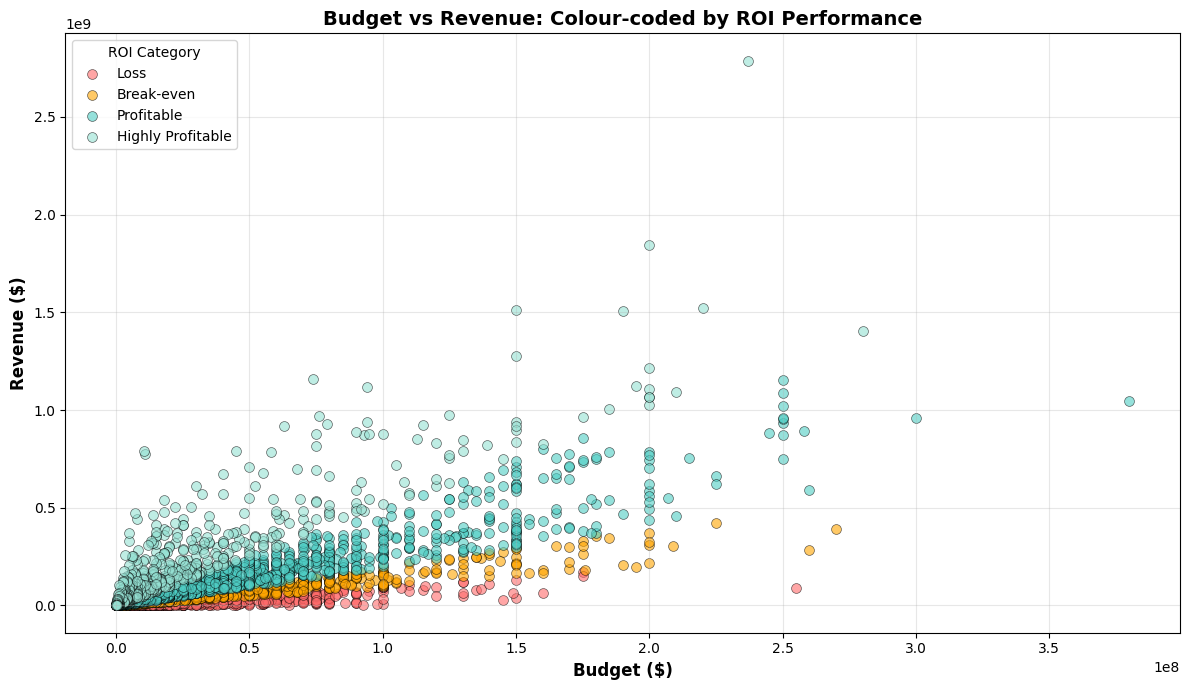


Top 5 Movies by ROI:
      Budget    Revenue         ROI
4238       1    8500000  8500000.00
3137      10   10000000  1000000.00
4577   15000  193355800    12890.39
4582     218    1162014     5330.34
4496   60000  248000000     4133.33


In [12]:
# =============================================================================
# H3.2a Visualisation of Budget vs Revenue Scatter Plot with ROI Colour-coding
# using Matplotlib
# =============================================================================
# Enhanced scatter plot with outlier highlighting
df_plot = df[['Budget', 'Revenue', 'ROI']].dropna()

# Calculate ROI-based colors
df_plot['ROI_category'] = pd.cut(df_plot['ROI'], bins=[0, 1, 2, 5, 100], labels=['Loss', 'Break-even', 'Profitable', 'Highly Profitable'])

plt.figure(figsize=(12, 7))
colors = {'Loss': '#FF6B6B', 'Break-even': '#FFA500', 'Profitable': '#4ECDC4', 'Highly Profitable': '#95E1D3'}

for category in df_plot['ROI_category'].cat.categories:
    subset = df_plot[df_plot['ROI_category'] == category]
    plt.scatter(subset['Budget'], subset['Revenue'], 
                label=category, alpha=0.6, s=50, c=colors[category], edgecolors='black', linewidth=0.5)

plt.xlabel('Budget ($)', fontsize=12, fontweight='bold')
plt.ylabel('Revenue ($)', fontsize=12, fontweight='bold')
plt.title('Budget vs Revenue: Colour-coded by ROI Performance', fontsize=14, fontweight='bold')
plt.legend(title='ROI Category', loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# H3.2b Display top performers by ROI
# =============================================================================
# Identify top performers
top_roi = df_plot.nlargest(5, 'ROI')[['Budget', 'Revenue', 'ROI']]
print("\nTop 5 Movies by ROI:")
print(top_roi.round(2))

**H3.3 Multi-Feature Correlation**

**Objective:** 

Understand how Budget, Revenue, ROI, Popularity, and Vote_average relate to each other

**Strong Positive Correlations:**
- Budget and Revenue: Higher budgets are associated with higher revenue
- Popularity and Vote_average: Movies with higher audience approval tend to be more popular.

**Weak or Negative Correlations:**
- ROI shows weaker correlation with other metrics, suggesting profitability is influenced by multiple external factors rather than just size or ratings.

**Actionable Insights:**
- Budget remains the strongest predictor of revenue.
- Quality (ratings) and popularity move together
- ROI optimisation requires balancing investment scale with audience and market appeal.

**Visualisation:**
- Plotly Heatmap chosen for its interactivity, allowing users to hover and view correlation values.
- Useful for stakeholder exploration of relationships between financial and audience-based features.

In [14]:
# =============================================================================
# H3.3 Visualisation of Correlation Matrix (Plotly Heatmap)
# Correlation Matrix Budget, Revenue, ROI, Popularity, Vote_average
# =============================================================================
# Select relevant columns and compute correlation matrix
cols = ['Budget', 'Revenue', 'ROI', 'Popularity', 'Vote_average']
corr_matrix = df[cols].corr()

# Create Plotly heatmap
fig = go.Figure(
    data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.index,
        colorscale='Inferno',
        colorbar=dict(title='Correlation'),
        zmin=-1, zmax=1,
        text=corr_matrix.round(2).astype(str),
        hoverinfo='text'
    )
)

fig.update_layout(
    title='Correlation Heatmap: Budget, Revenue, ROI, Popularity, Vote_average',
    xaxis_title='Features',
    yaxis_title='Features',
    width=700,
    height=600
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

**H3.4 Distribution of Key Success Metrics**

**Summary Statistics:**
- ROI: Median = 1.87, Mean = 2533.49
- Rating: Mean = 6.09, Std = 1.19

**Visualisation Showing:**

- Distribution of Key Success Metrics
    - Four-panel histogram grid displaying distributions of key variables: ROI, Budget (log scale), Revenue (log scale), and Vote Average (rating). 
    - Each histogram includes a reference line (median or mean) to indicate central tendency. Log scales are applied to Budget and Revenue to better visualise the right-skewed distributions typical of financial data.

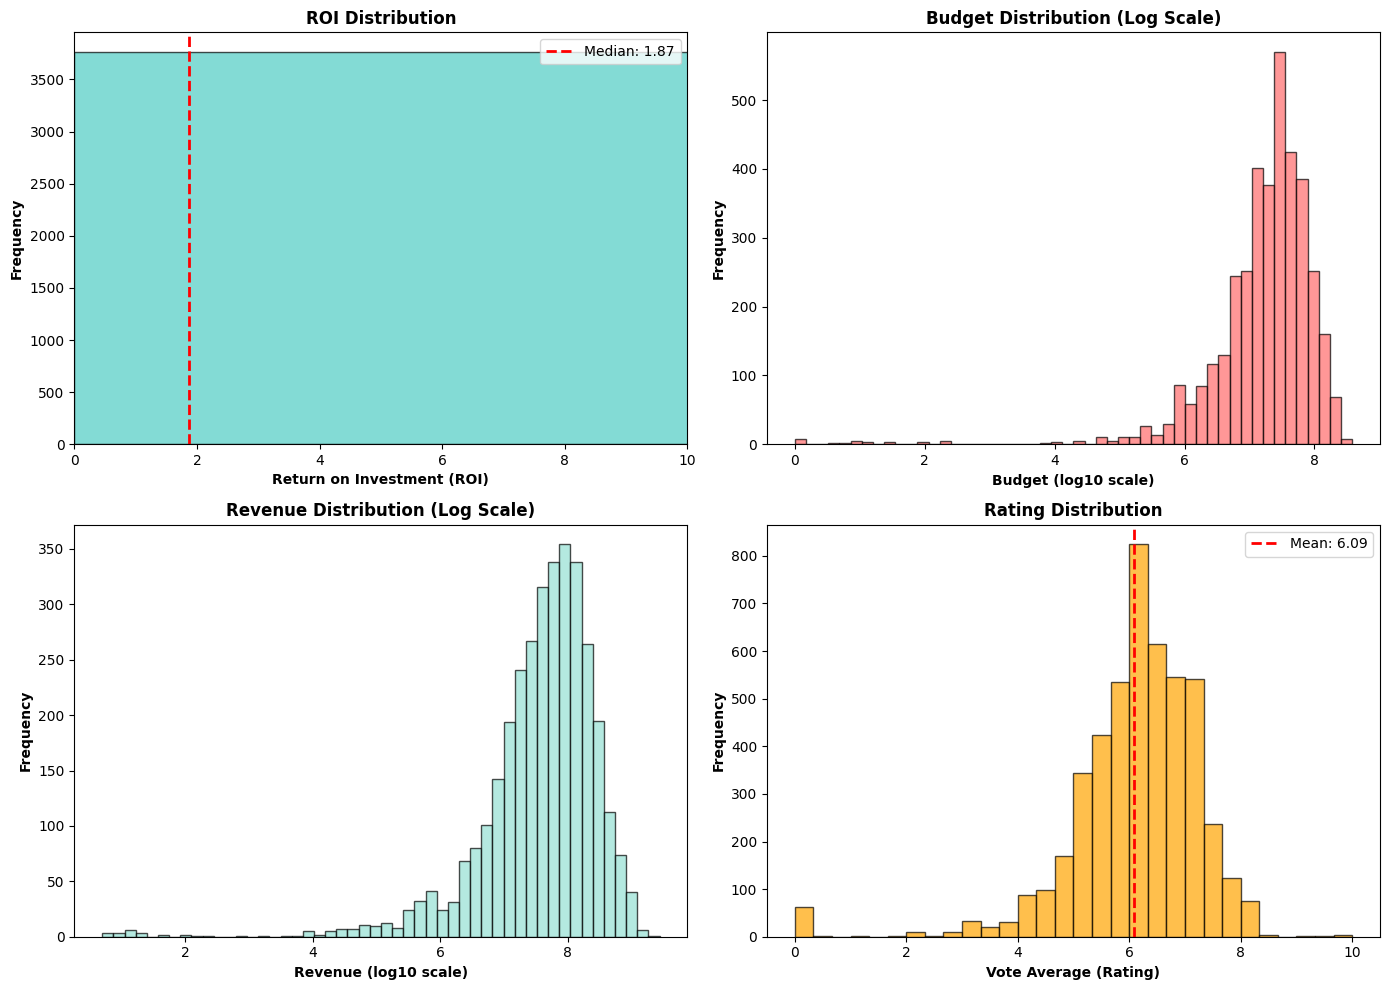

Summary Statistics:
ROI: Median = 1.87, Mean = 2533.49
Rating: Mean = 6.09, Std = 1.19


In [15]:
# =============================================================================
# H3.4a Visualisation of key success metrics distributions using Matplotlib
# =============================================================================
# Create distribution plots for key metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ROI distribution
axes[0, 0].hist(df['ROI'].dropna(), bins=50, color='#4ECDC4', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['ROI'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {df["ROI"].median():.2f}')
axes[0, 0].set_xlabel('Return on Investment (ROI)', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].set_title('ROI Distribution', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, 10)

# Budget distribution (log scale) - filter out zero and negative values
budget_valid = df['Budget'].dropna()
budget_valid = budget_valid[budget_valid > 0]
axes[0, 1].hist(np.log10(budget_valid), bins=50, color='#FF6B6B', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Budget (log10 scale)', fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontweight='bold')
axes[0, 1].set_title('Budget Distribution (Log Scale)', fontsize=12, fontweight='bold')

# Revenue distribution (log scale) - filter out zero and negative values
revenue_valid = df['Revenue'].dropna()
revenue_valid = revenue_valid[revenue_valid > 0]
axes[1, 0].hist(np.log10(revenue_valid), bins=50, color='#95E1D3', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Revenue (log10 scale)', fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontweight='bold')
axes[1, 0].set_title('Revenue Distribution (Log Scale)', fontsize=12, fontweight='bold')

# Vote Average distribution
axes[1, 1].hist(df['Vote_average'].dropna(), bins=30, color='#FFA500', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(df['Vote_average'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Vote_average"].mean():.2f}')
axes[1, 1].set_xlabel('Vote Average (Rating)', fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontweight='bold')
axes[1, 1].set_title('Rating Distribution', fontsize=12, fontweight='bold')
axes[1, 1].legend()

plt.tight_layout()
plt.show()
# =============================================================================
# H3.4b Statistical Summary Output
# =============================================================================
print("Summary Statistics:")
print(f"ROI: Median = {df['ROI'].median():.2f}, Mean = {df['ROI'].mean():.2f}")
print(f"Rating: Mean = {df['Vote_average'].mean():.2f}, Std = {df['Vote_average'].std():.2f}")

# Summary of Key Findings H3

| Hypotheses | Test Used | Result | Key Insight |
|------------|-----------|--------|-------------|
| **H3: Budget influences movie success** | Pearson Correlation | Significant (r=0.73, p<0.001) | Strong positive relationship - higher budgets yield higher revenues |

---
# Visualisations - Hypothesis 4

**"Action movies have a higher likelihood of box office success"**

First, we will create a column flagging movies with ‘Action’ among their genres. The genre column are in JSON-like strings so we will parse it and check if "Action" appears inside and then make a separate column for flagging them:

In [28]:
import ast

# Extract list of genre names from stringified JSON
def extract_genres(x):
    try:
        genres = ast.literal_eval(x)
        if isinstance(genres, list):
            return [g['name'] for g in genres if 'name' in g]
        else:
            return []
    except (ValueError, SyntaxError, TypeError):
        return []

df['Genre_list'] = df['Genres'].apply(extract_genres)

# Create a flag for Action movies

df['Is_Action'] = df['Genre_list'].apply(lambda genres: 'Action' in genres)


df['Is_Action'] = df['Is_Action'].astype('category')


df['Is_Action'].value_counts()


Is_Action
False    3649
True     1154
Name: count, dtype: int64

Add the column to df_revenue

In [29]:
df_revenue = df_revenue.merge(
    df[['Id', 'Is_Action', 'Genre_list']],  # keep only needed columns
    on='Id',
    how='left'
)

Let's now start off with some visualisations to understand this hypothesis:

We will plot revenue distributions with a box plot to compare Action and Non-Action movies:

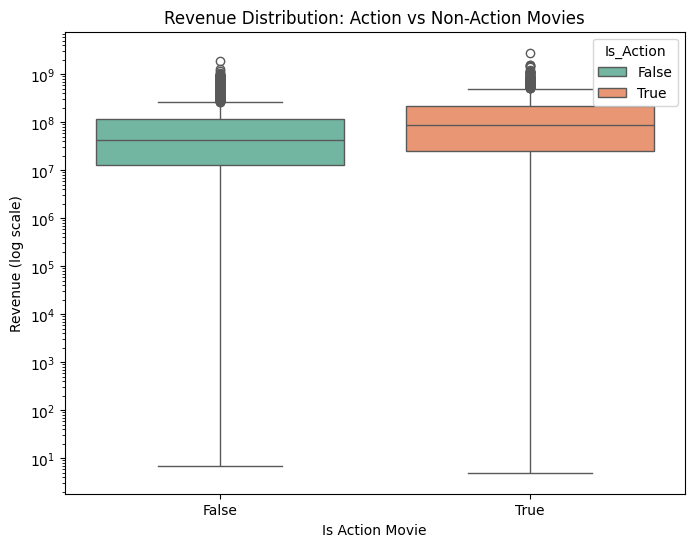

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_revenue, x='Is_Action', y='Revenue', palette='Set2', hue='Is_Action')
plt.yscale('log')  # Revenue often very skewed
plt.title('Revenue Distribution: Action vs Non-Action Movies')
plt.xlabel('Is Action Movie')
plt.ylabel('Revenue (log scale)')
plt.show()

- Movies with ‘Action’ among their genres have a slightly higher median revenue, implying the typical action film earns more.
- Despite the higher upside to the boxplot of action movies, the distributions overlap a lot meaning a certain genre alone isn't the only factor that contributes to overall revenue but it there is definitely a difference
- Overall, action movies tend to have a high upside and a higher typical revenue.

Let's now see the average profit of Action vs Non-Action Movies:

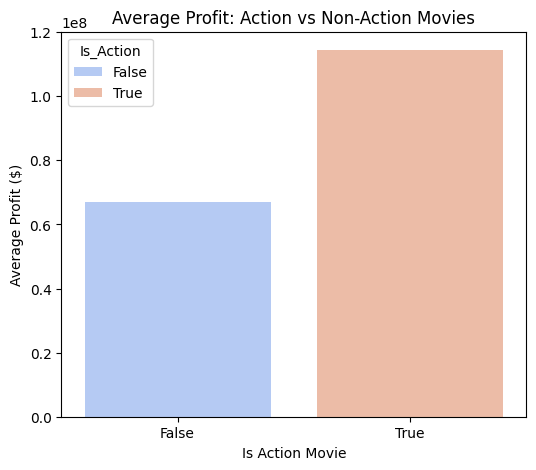

In [34]:
df_grouped = df_revenue.groupby('Is_Action', as_index=False, observed=False)['Profit'].mean()

plt.figure(figsize=(6,5))
sns.barplot(data=df_grouped, x='Is_Action', y='Profit', palette='coolwarm', hue='Is_Action')
plt.title('Average Profit: Action vs Non-Action Movies')
plt.xlabel('Is Action Movie')
plt.ylabel('Average Profit ($)')
plt.show()

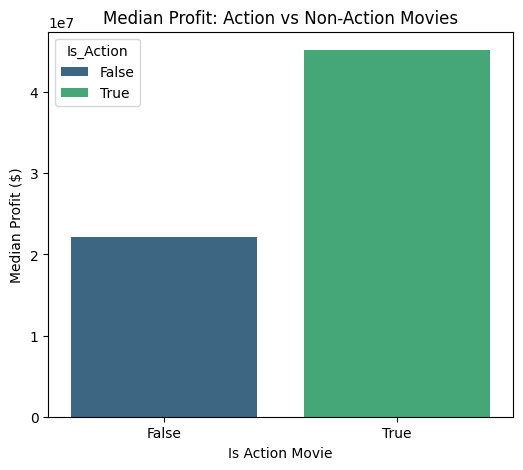

In [36]:
df_grouped_median = df_revenue.groupby('Is_Action', as_index=False, observed=False)['Profit'].median()

plt.figure(figsize=(6,5))
sns.barplot(data=df_grouped_median, x='Is_Action', y='Profit', palette='viridis', hue='Is_Action')
plt.title('Median Profit: Action vs Non-Action Movies')
plt.xlabel('Is Action Movie')
plt.ylabel('Median Profit ($)')
plt.show()

- On average, action movies generate much more profit than non-action movies. Although the action movies have a smaller sample size which may have had some impact on the results.
- Both mean and median confirm this to be the case leaving out any doubt that outliers had an effect on the results.

Let's now try to gauge the percentage of Action and Non-Action movies that have a profit (ROI):

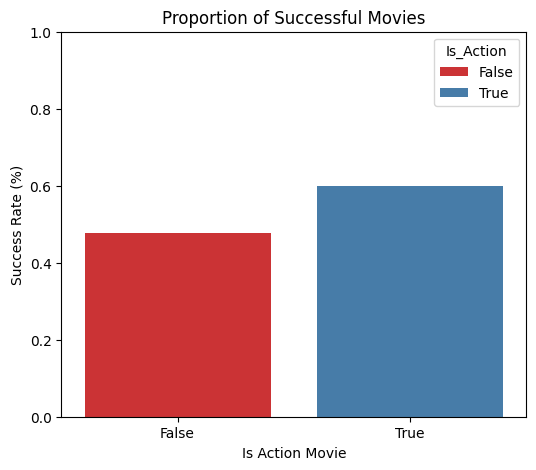

In [35]:
df['Success'] = df['Profit'] > 0

success_rate = df.groupby('Is_Action', observed=False)['Success'].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(data=success_rate, x='Is_Action', y='Success', palette='Set1', hue='Is_Action')
plt.title('Proportion of Successful Movies')
plt.xlabel('Is Action Movie')
plt.ylabel('Success Rate (%)')
plt.ylim(0,1)
plt.show()

- Action movies generally have a higher success rate but we should also take into consideration that the sample size is much lower. 
- The combination of similar success rates but higher profit margins for action movies suggests they follow a "high risk, high reward" pattern. 
- The difference in percentage is not as great as the average profit gained from an action movie compared to a non-action movie which suggests that when Action movies succeed, they tend to generate higher revenue.


Let's now see the revenue density distribution by Action vs Non-Action movies: 

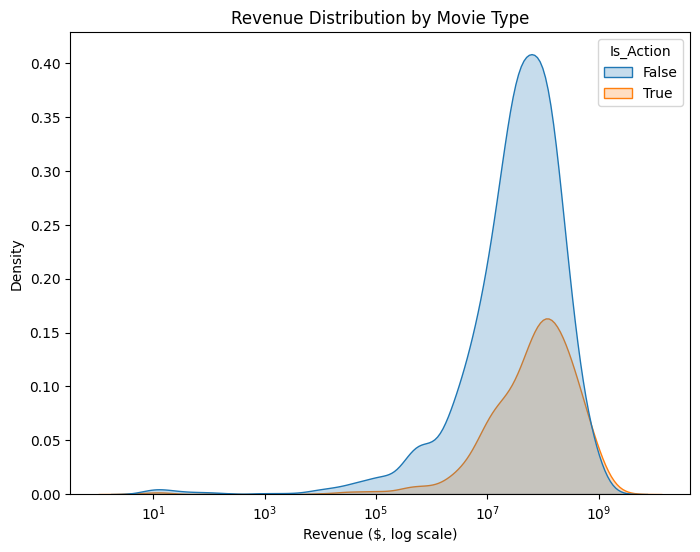

In [33]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df_revenue, x='Revenue', hue='Is_Action', log_scale=True, fill=True)
plt.title('Revenue Distribution by Movie Type')
plt.xlabel('Revenue ($, log scale)')
plt.show()

- Action movies show a broader, more spread-out distribution, while Non-Action movies have a tighter, more concentrated distribution. This indicates greater variability in Action movie revenues.
- Both distributions peak at relatively similar revenue levels, confirming that the most common revenue outcome is similar for both types. However, the Action movies' peak appears slightly higher on the revenue scale, suggesting their typical outcome is somewhat better. 
- While there's substantial overlap between the two distributions, the Action curve consistently sits slightly to the right of the Non-Action curve across most of the range

## Statistical Testing - Hypothesis 4 

We will compare Action vs Non-Action movies using Mann-Whitney U tests on Revenue and Profit. This non-parametric test is robust to skewed distributions and outliers.

In [ ]:
# Prepare data for tests 
action_mask = df_revenue['Is_Action'] == True
non_action_mask = df_revenue['Is_Action'] == False

rev_action = df_revenue.loc[action_mask, 'Revenue'].dropna()
rev_non_action = df_revenue.loc[non_action_mask, 'Revenue'].dropna()

prof_action = df_revenue.loc[action_mask, 'Profit'].dropna()
prof_non_action = df_revenue.loc[non_action_mask, 'Profit'].dropna()

print("Sample sizes:")
print(f"Revenue — Action: n={len(rev_action)}, Non-Action: n={len(rev_non_action)}")
print(f"Profit  — Action: n={len(prof_action)}, Non-Action: n={len(prof_non_action)}")

Sample sizes:
Revenue — Action: n=940, Non-Action: n=2436
Profit  — Action: n=918, Non-Action: n=2311


In [40]:
# Mann-Whitney U test — Revenue (two-sided)
alpha = 0.05
mw_rev = pg.mwu(x=rev_action, y=rev_non_action, alternative='two-sided')

print("Mann-Whitney U Test — Revenue:")
print(mw_rev)
print("\n--- Interpretation ---")
p_rev = mw_rev['p-val'].values[0]
rbc_rev = mw_rev['RBC'].values[0]
print(f"p-value: {p_rev:.6f} | Effect size (RBC): {rbc_rev:.4f}")
if p_rev < alpha:
    direction = "Action > Non-Action" if rbc_rev > 0 else "Action < Non-Action"
    print(f"SIGNIFICANT difference in revenue distributions ({direction}).")
else:
    print("No significant difference in revenue distributions.")

Mann-Whitney U Test — Revenue:
         U-val alternative         p-val       RBC      CLES
MWU  1413535.0   two-sided  3.626499e-26  0.234615  0.617307

--- Interpretation ---
p-value: 0.000000 | Effect size (RBC): 0.2346
SIGNIFICANT difference in revenue distributions (Action > Non-Action).


In [41]:
# Mann-Whitney U test — Profit (two-sided)
alpha = 0.05
mw_prof = pg.mwu(x=prof_action, y=prof_non_action, alternative='two-sided')

print("Mann-Whitney U Test — Profit:")
print(mw_prof)
print("\n--- Interpretation ---")
p_prof = mw_prof['p-val'].values[0]
rbc_prof = mw_prof['RBC'].values[0]
print(f"p-value: {p_prof:.6f} | Effect size (RBC): {rbc_prof:.4f}")
if p_prof < alpha:
    direction = "Action > Non-Action" if rbc_prof > 0 else "Action < Non-Action"
    print(f"SIGNIFICANT difference in profit distributions ({direction}).")
else:
    print("No significant difference in profit distributions.")

Mann-Whitney U Test — Profit:
         U-val alternative     p-val       RBC      CLES
MWU  1176670.5   two-sided  0.000001  0.109283  0.554641

--- Interpretation ---
p-value: 0.000001 | Effect size (RBC): 0.1093
SIGNIFICANT difference in profit distributions (Action > Non-Action).


In [ ]:
# Descriptive summary to accompany tests
summary = (
    df_revenue.assign(Is_Action=df_revenue['Is_Action'].map({True: 'Action', False: 'Non-Action'}))
    .groupby('Is_Action')
    [['Revenue', 'Profit']]
    .agg(['count', 'median', 'mean'])
)
print("\nDescriptive Summary (Revenue & Profit):\n")
print(summary)


Descriptive Summary (Revenue & Profit):

           Revenue                           Profit                          
             count      median          mean  count      median          mean
Is_Action                                                                    
Non-Action    2436  41708447.0  9.529472e+07   2311  22208180.0  6.714788e+07
Action         940  85490607.5  1.733616e+08    918  45189732.0  1.144244e+08


C:\Users\hamas\AppData\Local\Temp\ipykernel_16912\2848614712.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Is_Action')


### Directional and Robustness Checks

- One-sided Mann-Whitney tests to test the directional hypothesis (Action > Non-Action).
- Sensitivity: Repeat on log-transformed revenue (log1p) to reduce skew.

In [43]:
# One-sided Mann-Whitney: Action > Non-Action (Revenue)
alpha = 0.05
mw_rev_one_sided = pg.mwu(x=rev_action, y=rev_non_action, alternative='greater')
print("One-sided Mann-Whitney (Revenue): Action > Non-Action")
print(mw_rev_one_sided)
print(f"p-value: {mw_rev_one_sided['p-val'].values[0]:.6f}")

# One-sided Mann-Whitney: Action > Non-Action (Profit)
mw_prof_one_sided = pg.mwu(x=prof_action, y=prof_non_action, alternative='greater')
print("\nOne-sided Mann-Whitney (Profit): Action > Non-Action")
print(mw_prof_one_sided)
print(f"p-value: {mw_prof_one_sided['p-val'].values[0]:.6f}")

One-sided Mann-Whitney (Revenue): Action > Non-Action
         U-val alternative         p-val       RBC      CLES
MWU  1413535.0     greater  1.813250e-26  0.234615  0.617307
p-value: 0.000000

One-sided Mann-Whitney (Profit): Action > Non-Action
         U-val alternative         p-val       RBC      CLES
MWU  1176670.5     greater  6.142409e-07  0.109283  0.554641
p-value: 0.000001


In [44]:
# Sensitivity: log1p transform (Revenue) then Mann-Whitney two-sided
log_rev_action = np.log1p(rev_action)
log_rev_non_action = np.log1p(rev_non_action)

mw_log_rev = pg.mwu(x=log_rev_action, y=log_rev_non_action, alternative='two-sided')
print("\nMann-Whitney on log1p(Revenue):")
print(mw_log_rev)
print(f"p-value: {mw_log_rev['p-val'].values[0]:.6f} | RBC: {mw_log_rev['RBC'].values[0]:.4f}")


Mann-Whitney on log1p(Revenue):
         U-val alternative         p-val       RBC      CLES
MWU  1413535.0   two-sided  3.626499e-26  0.234615  0.617307
p-value: 0.000000 | RBC: 0.2346


## Results Summary - Hypothesis 4 (Action vs Non-Action Movies)

The following summary presents the Mann-Whitney U test results (revenue and profit),including effect sizes, one-sided directional checks, and insights.

In [ ]:
alpha = 0.05

summary_lines = []

# Two-sided Revenue
mw_rev = pg.mwu(x=rev_action, y=rev_non_action, alternative='two-sided')
p_rev = mw_rev['p-val'].values[0]
rbc_rev = mw_rev['RBC'].values[0]
dir_rev = 'Action > Non-Action' if rbc_rev > 0 else ('Action < Non-Action' if rbc_rev < 0 else 'No direction')
sig_rev = 'SIGNIFICANT' if p_rev < alpha else 'Not significant'
summary_lines.append(f"Revenue (two-sided): p={p_rev:.6f}, RBC={rbc_rev:.4f} → {sig_rev} ({dir_rev})")

# Two-sided Profit
mw_prof = pg.mwu(x=prof_action, y=prof_non_action, alternative='two-sided')
p_prof = mw_prof['p-val'].values[0]
rbc_prof = mw_prof['RBC'].values[0]
dir_prof = 'Action > Non-Action' if rbc_prof > 0 else ('Action < Non-Action' if rbc_prof < 0 else 'No direction')
sig_prof = 'SIGNIFICANT' if p_prof < alpha else 'Not significant'
summary_lines.append(f"Profit (two-sided):  p={p_prof:.6f}, RBC={rbc_prof:.4f} → {sig_prof} ({dir_prof})")

# One-sided (directional) checks: Action > Non-Action
mw_rev_greater = pg.mwu(x=rev_action, y=rev_non_action, alternative='greater')
mw_prof_greater = pg.mwu(x=prof_action, y=prof_non_action, alternative='greater')
summary_lines.append(f"Revenue (one-sided Action>Non-Action): p={mw_rev_greater['p-val'].values[0]:.6f}")
summary_lines.append(f"Profit  (one-sided Action>Non-Action): p={mw_prof_greater['p-val'].values[0]:.6f}")

# Sensitivity — log1p (Revenue)
log_rev_action = np.log1p(rev_action)
log_rev_non_action = np.log1p(rev_non_action)
mw_log_rev = pg.mwu(x=log_rev_action, y=log_rev_non_action, alternative='two-sided')
summary_lines.append(f"log1p(Revenue) (two-sided): p={mw_log_rev['p-val'].values[0]:.6f}, RBC={mw_log_rev['RBC'].values[0]:.4f}")

print("\n=== Mann-Whitney U Results Summary (Hypothesis 4) ===\n")
for line in summary_lines:
    print(line)

print("\n--- Insights ---")
# Interpretations
if p_prof < alpha and rbc_prof > 0:
    print("Action movies typically achieve higher profits than non-action movies (statistically significant).")
elif p_prof < alpha and rbc_prof < 0:
    print("Non-action movies typically achieve higher profits than action movies (statistically significant).")
else:
    print("No statistically significant difference in typical profits between action and non-action movies.")

if p_rev < alpha and rbc_rev > 0:
    print("Action movies tend to generate higher revenues than non-action movies (statistically significant).")
elif p_rev < alpha and rbc_rev < 0:
    print("Non-action movies tend to generate higher revenues than action movies (statistically significant).")
else:
    print("No statistically significant difference in revenue distributions between action and non-action movies.")

# Directional checks 
if mw_rev_greater['p-val'].values[0] < alpha:
    print("Directional check supports: Action revenues are greater than non-action (one-sided test).")
if mw_prof_greater['p-val'].values[0] < alpha:
    print("Directional check supports: Action profits are greater than non-action (one-sided test).")



=== Mann-Whitney U Results Summary (Hypothesis 4) ===

Revenue (two-sided): p=0.000000, RBC=0.2346 → SIGNIFICANT (Action > Non-Action)
Profit (two-sided):  p=0.000001, RBC=0.1093 → SIGNIFICANT (Action > Non-Action)
Revenue (one-sided Action>Non-Action): p=0.000000
Profit  (one-sided Action>Non-Action): p=0.000001
log1p(Revenue) (two-sided): p=0.000000, RBC=0.2346

--- Insights ---
Action movies typically achieve higher profits than non-action movies (statistically significant).
Action movies tend to generate higher revenues than non-action movies (statistically significant).
Directional check supports: Action revenues are greater than non-action (one-sided test).
Directional check supports: Action profits are greater than non-action (one-sided test).



---
# H5: English-language Movies Get Higher Ratings

**Research Question:** Do English-language movies receive different ratings than non-English movies?

**Statistical Approach:** Welch's t-test
- Compares means between two independent groups
- Doesn't assume equal variances

In [16]:
# =============================================================================
# H5a: Test if English-language movies get higher ratings
# =============================================================================
# Hypothesis:
#   H0 (null): Mean vote_average is the same for English and non-English movies
#   H1 (alt): Mean vote_average differs between English and non-English movies
#
# Test type: Independent samples t-test (Welch's t-test)
# Suitable for: Comparing means of two independent groups (English vs non-English)
# -----------------------------------------------------------------------------

# Drop rows with missing values in relevant columns
df_valid = df.dropna(subset=["Vote_average", "Original_language"]).copy()

# Create flag for English-language movies
df_valid['Is_english'] = df_valid['Original_language'] == 'en'

# Group vote_average values by English/non-English
english_ratings = df_valid.loc[df_valid['Is_english'], 'Vote_average']
non_english_ratings = df_valid.loc[~df_valid['Is_english'], 'Vote_average']

# Perform Welch's t-test
t_stat, p_val = ttest_ind(english_ratings, non_english_ratings, equal_var=False)

# =============================================================================
# Display results and interpretation
# =============================================================================
print("───────────────────────────────────────────────")
print(" T-Test: English vs Non-English Movie Ratings")
print("───────────────────────────────────────────────")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("\nResult: Statistically significant (p < 0.05)")
    print("Interpretation: There is evidence that English and non-English movies have different average ratings.")
else:
    print("\nResult: Not statistically significant (p ≥ 0.05)")
    print("Interpretation: No evidence that average ratings differ by language.")

mean_english = english_ratings.mean()
mean_non_english = non_english_ratings.mean()
print(f"\nMean rating (English): {mean_english:.2f}")
print(f"Mean rating (Non-English): {mean_non_english:.2f}")
print("───────────────────────────────────────────────")

───────────────────────────────────────────────
 T-Test: English vs Non-English Movie Ratings
───────────────────────────────────────────────
T-statistic: -5.664
P-value: 0.0000

Result: Statistically significant (p < 0.05)
Interpretation: There is evidence that English and non-English movies have different average ratings.

Mean rating (English): 6.07
Mean rating (Non-English): 6.49
───────────────────────────────────────────────


**H5b: Visualisation:**
- Seaborn violinplot, boxplot and stripplot with Matplotlib
- Chosen to show full distribution shape (violin) alongside quartiles (box) and individual data points (strip), enabling visual assessment of language rating differences


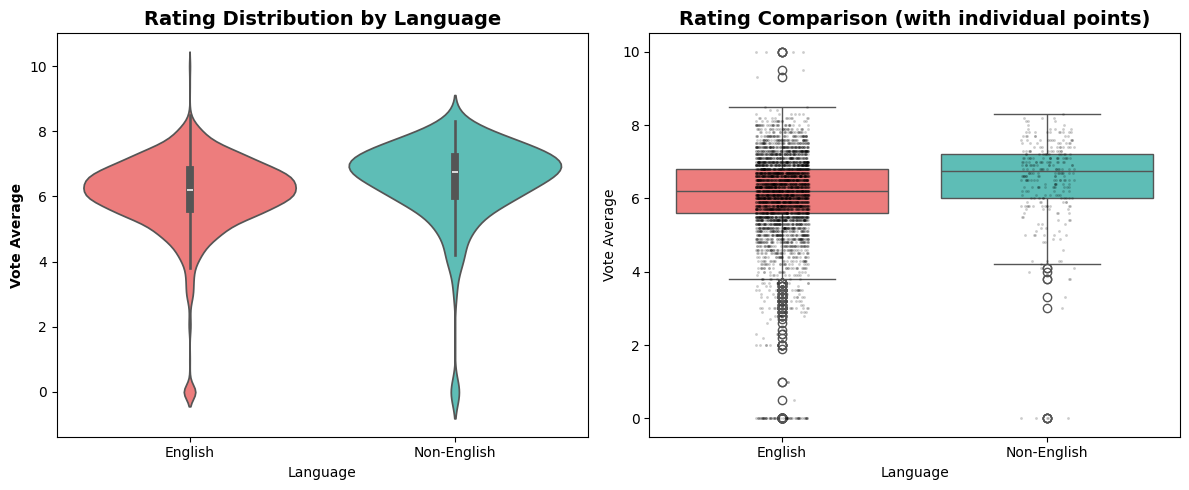


Sample sizes: English = 4505, Non-English = 298


In [17]:
# =============================================================================
# H5b Visualisation with violin Plot and box plot Side by Side using 
# Seaborn and Matplotlib 
# =============================================================================
# Visual comparison: English vs Non-English ratings distribution
plt.figure(figsize=(12, 5))

# Subplot 1: Violin plot
plt.subplot(1, 2, 1)
lang_data = pd.DataFrame({
    'Rating': pd.concat([english_ratings, non_english_ratings]),
    'Language': ['English']*len(english_ratings) + ['Non-English']*len(non_english_ratings)
})
sns.violinplot(x='Language', y='Rating', data=lang_data, hue='Language', palette=['#FF6B6B', '#4ECDC4'], legend=False)
plt.title('Rating Distribution by Language', fontsize=14, fontweight='bold')
plt.ylabel('Vote Average', fontweight='bold')

# Subplot 2: Box plot with data points
plt.subplot(1, 2, 2)
sns.boxplot(x='Language', y='Rating', data=lang_data, hue='Language', palette=['#FF6B6B', '#4ECDC4'], legend=False)
sns.stripplot(x='Language', y='Rating', data=lang_data, color='black', alpha=0.2, size=2)
plt.title('Rating Comparison (with individual points)', fontsize=14, fontweight='bold')
plt.ylabel('Vote Average')

plt.tight_layout()
plt.show()

print(f"\nSample sizes: English = {len(english_ratings)}, Non-English = {len(non_english_ratings)}")

# H5: Language and Ratings Insights

**T-Test: English vs Non-English Movie Ratings Results**

| Statistic                | Value   |
|--------------------------|---------|
| T-statistic              | -5.664  |
| P-value                  | 0.0000  |
| Mean rating (English)    | 6.07    |
| Mean rating (Non-English)| 6.49    |

**Interpretation**
- The T-test showed a significant difference (p < 0.05) between English and non-English movie ratings.
- The mean rating for non-English movies (6.49) is higher than for English ones (6.07).
- This does not support the hypothesis english language movies get higher ratings, results indicate non-English films perform slightly better on average.

**Visualisation:**
- Left Subplot: Violin Plot and Right Subplot: Box Plot plus Strip Plot
- Violin Plot Shows
    - Shape: Shows the full distribution of ratings
        - Wide sections: Where more movies cluster at that rating level
        - Narrow sections: Where fewer movies exist at that rating
    - Compares: English vs Non-English movie ratings visually
- Right Subplot: Box Plot plus Strip Plot
    - Box: Shows the quartiles (middle 50% of data)
    - Line in box: The median rating
    - Whiskers: The range (excluding outliers)
    - Black dots: Individual data points scattered to show density
    - Compares: Same English vs Non-English data in a different way

**Note: The print statement at the end shows how many movies in each group (to add context for  the visualisations)**

---
# H5:1 Visualisations and Insights

1. Check Top Languages by Movie Count & Average Rating

**Top 10 Languages Summary:**

| Language      | Mean Rating | Movie Count |
|---------------|-------------|-------------|
| English       | 6.07        | 4505        |
| French        | 6.43        | 70          |
| Chinese       | 6.36        | 39          |
| Spanish       | 6.66        | 32          |
| German        | 6.33        | 27          |
| Hindi         | 6.01        | 19          |
| Japanese      | 7.05        | 16          |
| Italian       | 7.03        | 14          |
| Korean        | 6.67        | 11          |
| Russian       | 6.35        | 11          |

**Visualisation:**
- Matplotlib dual-axis visualisation using bar chart and line plot
- Chosen to display movie frequency and average rating by language, revealing which languages are most represented and whether popularity correlates with quality ratings.
- The chart shows the number of movies for each of the top ten languages, with an overlaid line plot showing the average rating for each language.

Combined, the plot and summary chart reveal language representation within the dataset and highlight differences in average movie ratings by language..

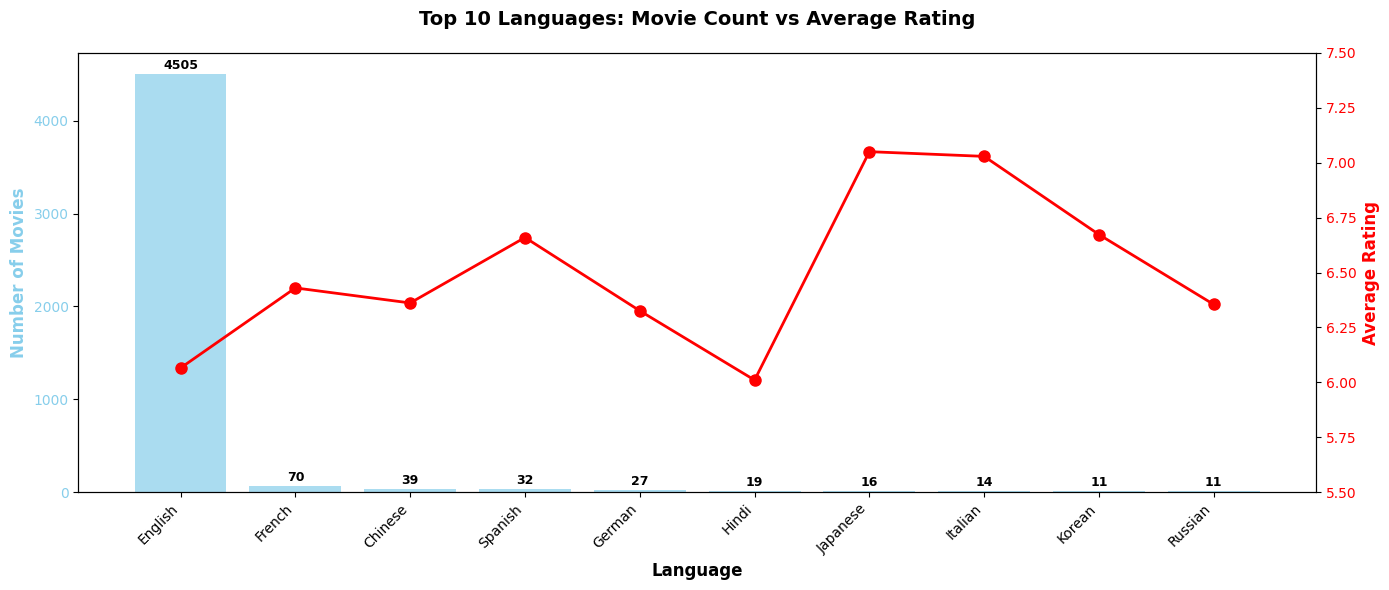


Top Languages Summary:
               mean  count
Language_full             
English        6.07   4505
French         6.43     70
Chinese        6.36     39
Spanish        6.66     32
German         6.33     27
Hindi          6.01     19
Japanese       7.05     16
Italian        7.03     14
Korean         6.67     11
Russian        6.35     11


In [18]:
# =============================================================================
# H5.1a Analysis of Top Languages by Movie Count and Average Rating
# =============================================================================
#
# Get top 10 languages by movie count
top_languages = df['Language_full'].value_counts().head(10)

# Calculate average rating for each top language
lang_ratings = df.groupby('Language_full')['Vote_average'].agg(['mean', 'count']).loc[top_languages.index]

# Create dual-axis plot
fig, ax1 = plt.figure(figsize=(14, 6)), plt.gca()

# Bar plot: Movie count
x_pos = np.arange(len(top_languages))
bars = ax1.bar(x_pos, top_languages.values, color='skyblue', alpha=0.7, label='Movie Count')
ax1.set_xlabel('Language', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Movies', fontsize=12, fontweight='bold', color='skyblue')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(top_languages.index, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot: Average rating
ax2 = ax1.twinx()
line = ax2.plot(x_pos, lang_ratings['mean'].values, color='red', marker='o', linewidth=2, markersize=8, label='Avg Rating')
ax2.set_ylabel('Average Rating', fontsize=12, fontweight='bold', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(5.5, 7.5)

# Add value labels on bars
for i, v in enumerate(top_languages.values):
    ax1.text(i, v + 20, str(v), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title('Top 10 Languages: Movie Count vs Average Rating', fontsize=14, fontweight='bold', pad=20)
fig.tight_layout()
plt.show()

print("\nTop Languages Summary:")
print(lang_ratings.round(2))

---

# Summary of Key Findings H5

| Hypotheses | Test Used | Result | Key Insight |
|------------|-----------|--------|-------------|
| **H5: English-language movies get higher ratings** | Welch's t-test | Significant (t=-5.66, p<0.001) | Non-English movies have slightly higher average ratings (6.49 vs 6.07). H5 not supported |

---

# Visualisations - Hypothesis 6

**"There will be a difference in popularity between the genres"**

Before exploring differences in popularity, we first make sure that each movie has a clearly defined primary genre. Some movies belong to multiple genres, so we extract the first listed one to keep our analysis consistent. This helps ensure we’re comparing categories fairly.

In [8]:

import ast  # safer than eval

def extract_primary_genre(x):
    if isinstance(x, str) and '[' in x:
        try:
            genres = ast.literal_eval(x)  # safer alternative to eval
            if isinstance(genres, list) and len(genres) > 0 and isinstance(genres[0], dict):
                return genres[0].get('name', 'Unknown')
            else:
                return 'Unknown'
        except (ValueError, SyntaxError):
            return 'Unknown'
    return 'Unknown'

df['Primary_Genre'] = df['Genres'].apply(extract_primary_genre)
df['Primary_Genre'] = df['Primary_Genre'].astype('category')


In [11]:
print(df['Primary_Genre'].value_counts().head(21))
print("Unique genres:", df['Primary_Genre'].nunique())


Primary_Genre
Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Unknown              28
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: count, dtype: int64
Unique genres: 21


C:\Users\hamas\AppData\Local\Temp\ipykernel_8508\484319063.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\hamas\AppData\Local\Temp\ipykernel_8508\484319063.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(
C:\Users\hamas\AppData\Local\Temp\ipykernel_8508\484319063.py:14: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(
C:\Users\hamas\AppData\Local\Temp\ipykernel_8508\484319063.py:30: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  plt.tight_layout()
c:\Hamas\AI\AI_Projects\Code_Institute_Projects\hackathon2_team1\Team1_TMDb_Hackathon_2\.venv\Lib\site-pac

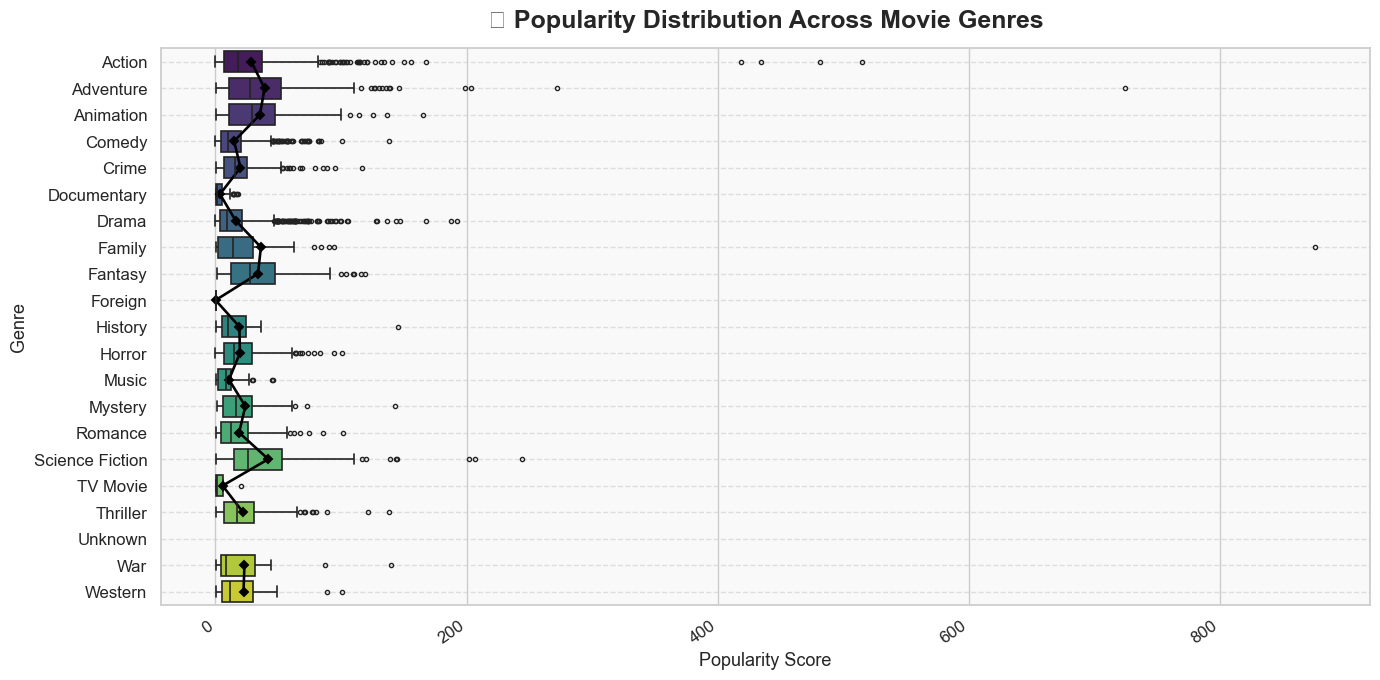

In [34]:
sns.set(style="whitegrid", font_scale=1.1, rc={'axes.facecolor':'#f9f9f9'})

plt.figure(figsize=(14,7))

sns.boxplot(
    x='Popularity',
    y='Primary_Genre',
    data=df,
    palette='viridis',   
    linewidth=1.2,
    fliersize=3
)

sns.pointplot(
    x='Popularity',
    y='Primary_Genre',
    data=df,
    estimator='mean',
    color='black',
    markers='D',
    scale=0.7,
    ci=None
)

plt.xticks(rotation=35, ha='right')
plt.title('🎬 Popularity Distribution Across Movie Genres', fontsize=18, pad=15, weight='bold')
plt.xlabel('Popularity Score', fontsize=13)
plt.ylabel('Genre', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- The plot makes it obvious that some genres consistently sit higher than others. 
- Adventure and Animation movies show higher medians and wider spreads meaning they not only tend to be more popular but also have a few major hits that push the upper range up.
- In contrast, Documentaries and Dramas sit much lower, suggesting that these genres attract smaller, more niche audiences.
- Overall, this visual already hints that popularity differs by genre, setting the stage for statistical testing.

C:\Users\hamas\AppData\Local\Temp\ipykernel_8508\2397010179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Primary_Genre', y='Popularity', data=df, palette='muted', inner='quart', legend=False)
C:\Users\hamas\AppData\Local\Temp\ipykernel_8508\2397010179.py:7: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from current font.
  plt.tight_layout()
c:\Hamas\AI\AI_Projects\Code_Institute_Projects\hackathon2_team1\Team1_TMDb_Hackathon_2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


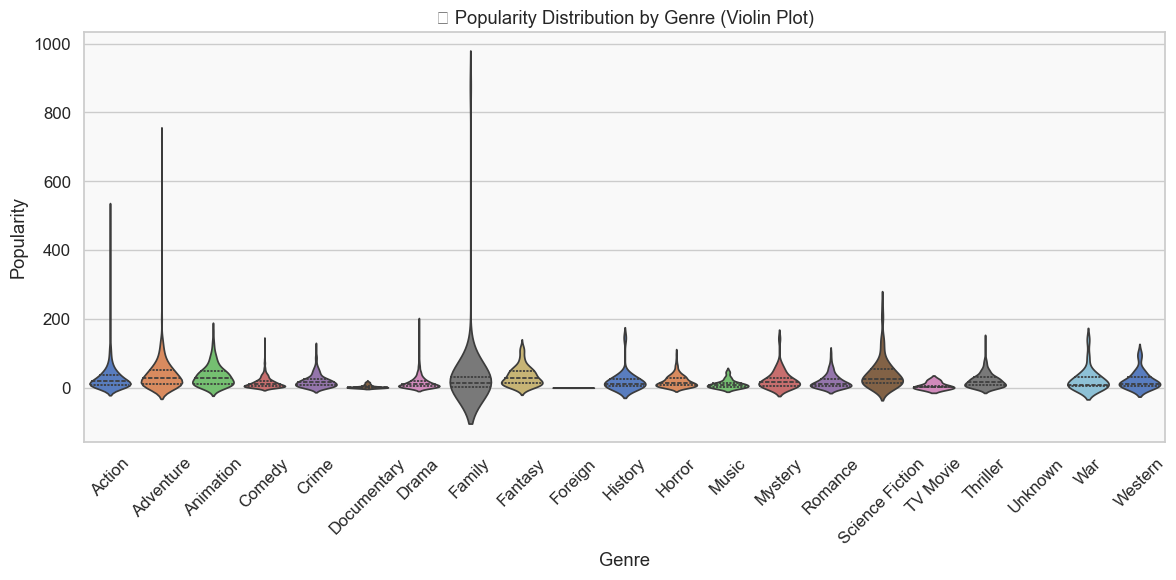

In [35]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Primary_Genre', y='Popularity', data=df, palette='muted', inner='quart', legend=False)
plt.xticks(rotation=45)
plt.title('🎻 Popularity Distribution by Genre (Violin Plot)')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()


- Here, you can clearly see how some genres have a very wide spread of popularity like Action and Adventure and Family, reflecting both popular and less-known releases. 
- Meanwhile, narrower shapes like Documentary or Drama indicate that most of their movies cluster around lower popularity levels.
- The density “bulges” make the story more solid, for example Action has a large upper tail where many high-performing movies sit, while Drama peaks sharply around a low median.
- This reinforces that different genres attract audiences at very different levels of intensity.

C:\Users\hamas\AppData\Local\Temp\ipykernel_8508\1110499005.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_popularity = df.groupby('Primary_Genre')['Popularity'].mean().sort_values(ascending=False)
C:\Users\hamas\AppData\Local\Temp\ipykernel_8508\1110499005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='coolwarm')


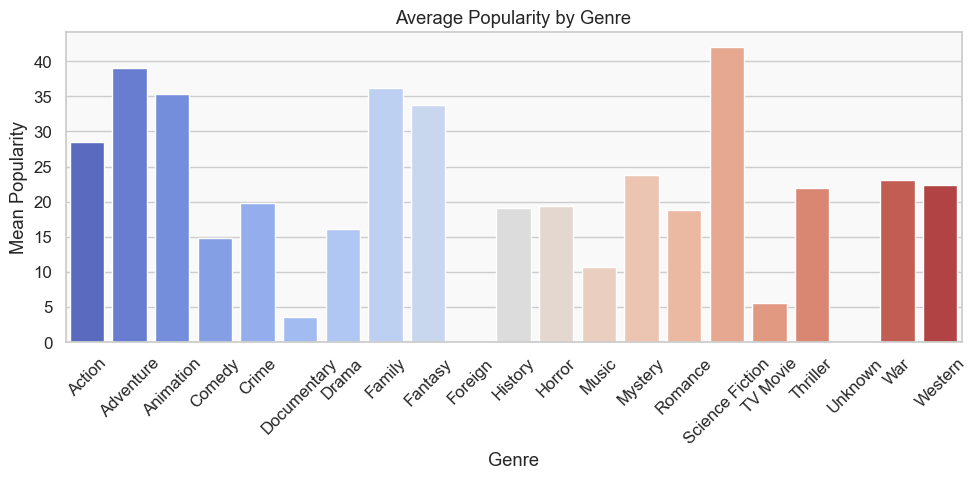

In [36]:
genre_popularity = df.groupby('Primary_Genre')['Popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Popularity')
plt.tight_layout()
plt.show()


- Action and Science Fiction stand out as the most popular, with Family, Animation and Fantasy not far behind. On the other end, genres like Documentaries TV Movie lag significantly behind.
- The strong separation in bar heights visually supports the hypothesis that genre is a key factor influencing popularity and it clearly shows just how large that difference really is.

# Statistical Tests - Hypothesis 6

In [39]:
genre_a = 'Action'
genre_b = 'Comedy'

data_a = df[df['Primary_Genre'] == genre_a]['Popularity']
data_b = df[df['Primary_Genre'] == genre_b]['Popularity']

In [40]:
normal_a = pg.normality(data_a)
normal_b = pg.normality(data_b)

print(f"{genre_a} normality p = {normal_a['pval'][0]:.4f}")
print(f"{genre_b} normality p = {normal_b['pval'][0]:.4f}")

Action normality p = 0.0000
Comedy normality p = 0.0000


C:\Users\hamas\AppData\Local\Temp\ipykernel_8508\2648811939.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{genre_a} normality p = {normal_a['pval'][0]:.4f}")
C:\Users\hamas\AppData\Local\Temp\ipykernel_8508\2648811939.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{genre_b} normality p = {normal_b['pval'][0]:.4f}")


Before running any comparison tests, we checked whether popularity scores for Action and Comedy movies followed a normal distribution using the Shapiro–Wilk test.
Both genres returned extremely small p-values (p < 0.001), meaning the data is not normally distributed. This tells us that the usual t-test wouldn’t be appropriate here so we’ll need to use a non-parametric test like the Mann–Whitney U test, which doesn’t assume normality.

In [42]:
mannwhitney = pg.mwu(data_a, data_b, alternative='two-sided')
mannwhitney

,U-val,alternative,p-val,RBC,CLES
MWU,501445.5,two-sided,1.334305e-23,0.276482,0.638241


Since neither group was normally distributed, we used the Mann–Whitney U test to see if there’s a significant difference in popularity between Action and Comedy films.
The test produced a U-value of 501,445.5 with a p-value ≈ 1.33e−23, which is far below 0.05. This means the difference is statistically significant — Action and Comedy films differ in popularity in a way that isn’t due to random chance.
The Rank-Biserial Correlation (RBC = 0.28) suggests a moderate effect size, meaning Action movies tend to be meaningfully more popular on average than Comedy films.
The Common Language Effect Size (CLES = 0.64) further supports this. There’s roughly a 64% chance a randomly chosen Action movie is more popular than a randomly chosen Comedy movie.

In [44]:
pairwise_results = pg.pairwise_tests(
    data=df,
    dv='Popularity',
    between='Primary_Genre',
    parametric=False,   
    padjust='bonf', 
    effsize='hedges' 
)

pairwise_results.head()



,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,Primary_Genre,Action,Adventure,False,False,105114.0,two-sided,2.601013e-06,4.941925e-04,bonf,-0.235309
1,Primary_Genre,Action,Animation,False,False,37408.0,two-sided,5.804239e-04,1.102805e-01,bonf,-0.171627
2,Primary_Genre,Action,Comedy,False,False,501445.5,two-sided,1.334305e-23,2.535179e-21,bonf,0.467967
3,Primary_Genre,Action,Crime,False,False,82766.0,two-sided,6.700295e-03,1.000000e+00,bonf,0.227161
4,Primary_Genre,Action,Documentary,False,False,59369.0,two-sided,1.453907e-32,2.762424e-30,bonf,0.636838


To expand beyond a single genre pair, we ran pairwise non-parametric tests comparing every genre combination.
The results confirmed that several pairs show statistically significant differences in popularity even after applying Bonferroni correction for multiple testing.
Some highlights include:

Action vs. Comedy (p < 1e−21): Action significantly higher popularity

Action vs. Documentary (p < 1e−30): Action films again significantly more popular

Action vs. Adventure (p < 0.001): a smaller difference, but still statistically meaningful

The effect sizes vary from small to large across comparisons, but overall, Action consistently outperforms slower-paced or niche genres. This reinforces the visual trends we observed earlier.

In [ ]:

kw = pg.kruskal(data=df, dv='Popularity', between='Primary_Genre')
H = kw['H'].iloc[0]
k = df['Primary_Genre'].nunique()
N = df['Primary_Genre'].notna().sum()
eps_sq = (H - k + 1) / (N - k)
print(kw)
print(f"Epsilon-squared: {eps_sq:.3f}")

                Source  ddof1           H         p-unc
Kruskal  Primary_Genre     19  514.924619  4.116365e-97
Epsilon-squared: 0.104


To formally test whether popularity differs across all genres (not just pairs), we used the Kruskal–Wallis test which is a non-parametric alternative to ANOVA.
The results were highly significant:

H(19) = 514.92, p ≈ 4.12e−97

Epsilon-squared = 0.104

These results confirm that genre has a strong, statistically significant influence on popularity.
The medium-to-large effect size shows this isn’t a small difference but it’s a meaningful one across the dataset.

## Summary

Across all tests, both the visualizations and the statistical evidence consistently show movie popularity  differs significantly by genre.

The non-parametric analyses confirmed strong, reliable differences, with Action, Adventure, Science fiction, Animation, Family etc. These genres generally achieve higher popularity scores, while genres like Drama, Music, Documentary, TV Movie etc. generally lagged behind.
Pairwise tests backed this up with very small p-values and moderate-to-large effect sizes, meaning the pattern isn’t due to chance.

In short, the results support Hypothesis 6: There is a significant difference in popularity between genres. These differences are not only statistically significant but also practically meaningful reflecting how audience interest varies depending on genre style.

---

# Conclusions and Next Steps:

## Conclusions:

- Filtered out rows with zero budget/revenue to avoid distortions and worked with a clean revenue subset. 
- Engineered useful fields, including Action genre flags and a Success indicator.
- Used visualisations to investigate Hypotheses
- Conducted Statistical tests (t‑test and Mann‑Whitney U) indicated a significant difference in revenues between high and low ratings as well as Action vs Non-Action Movies.
- Overall: Ratings are a modest indicator of success; Popularity correlated more strongly with revenue. Genre alone doesn’t guarantee success, but Action increases upside potential. Given skew and outliers, medians and non‑parametric tests provide more robust insight than means alone.
- Higher budgets generally lead to higher revenues and better ROI:
    - However, outliers exist, meaning budget alone does not determine success.
        - Additional factors such as genre, timing, marketing, and cast should be explored alongside budget, as financial investment alone is not a sole determiner of success.
- Non-English movies receive slightly higher average ratings (H5 not supported), though this would need further exploration, given that English-language films dominate the dataset numerically.

## Additional Exploratory Findings

| Analysis | Test Used | Result | Key Insight |
|----------|-----------|--------|-------------|
| **ROI varies by budget** | Kruskal-Wallis | Significant (H=21.30, p<0.001) | High-budget films show best median ROI (2.17x) |
| **Multi-feature correlations** | Correlation matrix | Multiple patterns | Budget strongest predictor of revenue; ratings and popularity correlate |

#

## Next Steps: 

- Use findings to determine what is best to keep for creating prediction model
- Use findings to determine what will be used in the PowerBI dashboard
- Use findings to present key findings in the presentation